<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Machine learning - Customer Conversion Prediction</b></div>

![](https://img.freepik.com/vetores-gratis/pagina-de-destino-do-marketing-digital_33099-1726.jpg?t=st=1724162688~exp=1724166288~hmac=8858e926e48b2f568ab1d96b7b43e3494e318657a24cd9ba9d5d68f87a59d297&w=740)


## Part 1- Business Problem: Customer Conversion Prediction

#### **Objective:**
Develop a predictive model capable of identifying which customers are most likely to convert (make a purchase or take a desired action) after interacting with digital marketing campaigns. This would help marketing teams optimize their strategies and resource allocation, improving conversion rates and return on investment (ROI).

#### **Business Questions:**
1. **What are the most influential factors in customer conversion?**
   - Identify which variables, such as campaign channel, campaign type, website engagement, or purchase history, have the greatest impact on conversion likelihood.

2. **How can marketing budgets be optimized?**
   - Analyze how different levels of campaign investment (AdSpend) affect conversion rates, allowing for more efficient resource allocation.

3. **Which marketing channel is most effective for different customer profiles?**
   - Evaluate the effectiveness of different marketing channels (Email, Social Media, SEO, PPC, Referral) for various demographic segments.

4. **Which marketing strategies lead to higher customer retention and loyalty?**
   - Determine if customers who convert are more likely to become loyal (based on variables like LoyaltyPoints).

#### **Indicators and Metrics:**
- **Conversion Rate**: The primary metric to evaluate campaign success.
- **Return on Investment (ROI)**: Financial assessment of the campaign's impact.
- **Customer Engagement**: Measures like WebsiteVisits, TimeOnSite, SocialShares, EmailOpens, and EmailClicks, indicating the level of customer interest and interaction with the marketing content.

#### **Applications:**
- **Customer Segmentation:** Divide the customer base into segments with different conversion probabilities, enabling more targeted campaigns.
- **Channel Attribution:** Determine which channels are most effective for different segments and campaigns.
- **Campaign Optimization:** Adjust the type of campaign and channels used based on insights from the predictive model.

This business problem can be the foundation for various predictive analyses and strategic optimizations, helping companies improve their marketing approach and significantly increase conversion rates.

In [1]:
!pip install watermark
!pip install shap

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-conversion-in-digital-marketing-dataset/digital_marketing_campaign_dataset.csv
/kaggle/input/predict-customer-purchase-behavior-dataset/customer_purchase_data.csv


In [3]:
# System libraries
import re
import os
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuration for graphs width and layout of graphs
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove warnings
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.13
Author: Library versions

re        : 2.2.1
seaborn   : 0.12.2
matplotlib: 3.7.5
numpy     : 1.26.4
plotly    : 5.18.0
watermark : 2.4.3
pandas    : 2.2.2



# Part 2) Database

In [4]:
# Database
data = pd.read_csv("/kaggle/input/predict-conversion-in-digital-marketing-dataset/digital_marketing_campaign_dataset.csv")
data

CustomerID  Age  Gender  Income CampaignChannel   CampaignType  \
0           8000   56  Female  136912    Social Media      Awareness   
1           8001   69    Male   41760           Email      Retention   
2           8002   46  Female   88456             PPC      Awareness   
3           8003   32  Female   44085             PPC     Conversion   
4           8004   60  Female   83964             PPC     Conversion   
...          ...  ...     ...     ...             ...            ...   
7995       15995   21    Male   24849           Email      Awareness   
7996       15996   43  Female   44718             SEO      Retention   
7997       15997   28  Female  125471        Referral  Consideration   
7998       15998   19  Female  107862             PPC  Consideration   
7999       15999   31  Female   93002           Email      Awareness   

          AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  \
0     6497.870068          0.043919        0.088031              0   
1     3898.668606          0.155725        0.182725             42   
2     1546.429596          0.277490        0.076423              2   
3      539.525936          0.137611        0.088004             47   
4     1678.043573          0.252851        0.109940              0   
...           ...               ...             ...            ...   
7995  8518.308575          0.243792        0.116773             23   
7996  1424.613446          0.236740        0.190061             49   
7997  4609.534635          0.056526        0.133826             35   
7998  9476.106354          0.023961        0.138386             49   
7999  7743.627070          0.185670        0.057228             15   

      PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  EmailClicks  \
0          2.399017    7.396803            19           6            9   
1          2.917138    5.352549             5           2            7   
2          8.223619   13.794901             0          11            2   
3          4.540939   14.688363            89           2            2   
4          2.046847   13.993370             6           6            6   
...             ...         ...           ...         ...          ...   
7995       9.693602   14.227794            70          13            6   
7996       9.499010    3.501106            52          13            1   
7997       2.853241   14.618323            38          16            0   
7998       1.002964    3.876623            86           1            5   
7999       6.964739   12.763660             2          18            9   

      PreviousPurchases  LoyaltyPoints AdvertisingPlatform AdvertisingTool  \
0                     4            688            IsConfid      ToolConfid   
1                     2           3459            IsConfid      ToolConfid   
2                     8           2337            IsConfid      ToolConfid   
3                     0           2463            IsConfid      ToolConfid   
4                     8           4345            IsConfid      ToolConfid   
...                 ...            ...                 ...             ...   
7995                  7            286            IsConfid      ToolConfid   
7996                  5           1502            IsConfid      ToolConfid   
7997                  3            738            IsConfid      ToolConfid   
7998                  7           2709            IsConfid      ToolConfid   
7999                  9            341            IsConfid      ToolConfid   

      Conversion  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
7995           0  
7996           0  
7997           1  
7998           1  
7999           0  

[8000 rows x 20 columns]

In [5]:
# Viewing the first 5 data
data.head()

CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

  AdvertisingPlatform AdvertisingTool  Conversion  
0            IsConfid      ToolConfid           1  
1            IsConfid      ToolConfid           1  
2            IsConfid      ToolConfid           1  
3            IsConfid      ToolConfid           1  
4            IsConfid      ToolConfid           1

In [6]:
# Viewing the last 5 data
data.tail()

CustomerID  Age  Gender  Income CampaignChannel   CampaignType  \
7995       15995   21    Male   24849           Email      Awareness   
7996       15996   43  Female   44718             SEO      Retention   
7997       15997   28  Female  125471        Referral  Consideration   
7998       15998   19  Female  107862             PPC  Consideration   
7999       15999   31  Female   93002           Email      Awareness   

          AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  \
7995  8518.308575          0.243792        0.116773             23   
7996  1424.613446          0.236740        0.190061             49   
7997  4609.534635          0.056526        0.133826             35   
7998  9476.106354          0.023961        0.138386             49   
7999  7743.627070          0.185670        0.057228             15   

      PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  EmailClicks  \
7995       9.693602   14.227794            70          13            6   
7996       9.499010    3.501106            52          13            1   
7997       2.853241   14.618323            38          16            0   
7998       1.002964    3.876623            86           1            5   
7999       6.964739   12.763660             2          18            9   

      PreviousPurchases  LoyaltyPoints AdvertisingPlatform AdvertisingTool  \
7995                  7            286            IsConfid      ToolConfid   
7996                  5           1502            IsConfid      ToolConfid   
7997                  3            738            IsConfid      ToolConfid   
7998                  7           2709            IsConfid      ToolConfid   
7999                  9            341            IsConfid      ToolConfid   

      Conversion  
7995           0  
7996           0  
7997           1  
7998           1  
7999           0

In [7]:
# Rows and columns
data.shape

(8000, 20)

In [8]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [9]:
# Data type
data.dtypes

CustomerID               int64
Age                      int64
Gender                  object
Income                   int64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion               int64
dtype: object

# Part 3) Exploratory data analysis

In [10]:
data.describe().T

count          mean           std           min  \
CustomerID         8000.0  11999.500000   2309.545410   8000.000000   
Age                8000.0     43.625500     14.902785     18.000000   
Income             8000.0  84664.196750  37580.387945  20014.000000   
AdSpend            8000.0   5000.944830   2838.038153    100.054813   
ClickThroughRate   8000.0      0.154829      0.084007      0.010005   
ConversionRate     8000.0      0.104389      0.054878      0.010018   
WebsiteVisits      8000.0     24.751625     14.312269      0.000000   
PagesPerVisit      8000.0      5.549299      2.607358      1.000428   
TimeOnSite         8000.0      7.727718      4.228218      0.501669   
SocialShares       8000.0     49.799750     28.901165      0.000000   
EmailOpens         8000.0      9.476875      5.711111      0.000000   
EmailClicks        8000.0      4.467375      2.856564      0.000000   
PreviousPurchases  8000.0      4.485500      2.888093      0.000000   
LoyaltyPoints      8000.0   2490.268500   1429.527162      0.000000   
Conversion         8000.0      0.876500      0.329031      0.000000   

                            25%           50%            75%            max  
CustomerID          9999.750000  11999.500000   13999.250000   15999.000000  
Age                   31.000000     43.000000      56.000000      69.000000  
Income             51744.500000  84926.500000  116815.750000  149986.000000  
AdSpend             2523.221165   5013.440044    7407.989369    9997.914781  
ClickThroughRate       0.082635      0.154505       0.228207       0.299968  
ConversionRate         0.056410      0.104046       0.152077       0.199995  
WebsiteVisits         13.000000     25.000000      37.000000      49.000000  
PagesPerVisit          3.302479      5.534257       7.835756       9.999055  
TimeOnSite             4.068340      7.682956      11.481468      14.995311  
SocialShares          25.000000     50.000000      75.000000      99.000000  
EmailOpens             5.000000      9.000000      14.000000      19.000000  
EmailClicks            2.000000      4.000000       7.000000       9.000000  
PreviousPurchases      2.000000      4.000000       7.000000       9.000000  
LoyaltyPoints       1254.750000   2497.000000    3702.250000    4999.000000  
Conversion             1.000000      1.000000       1.000000       1.000000

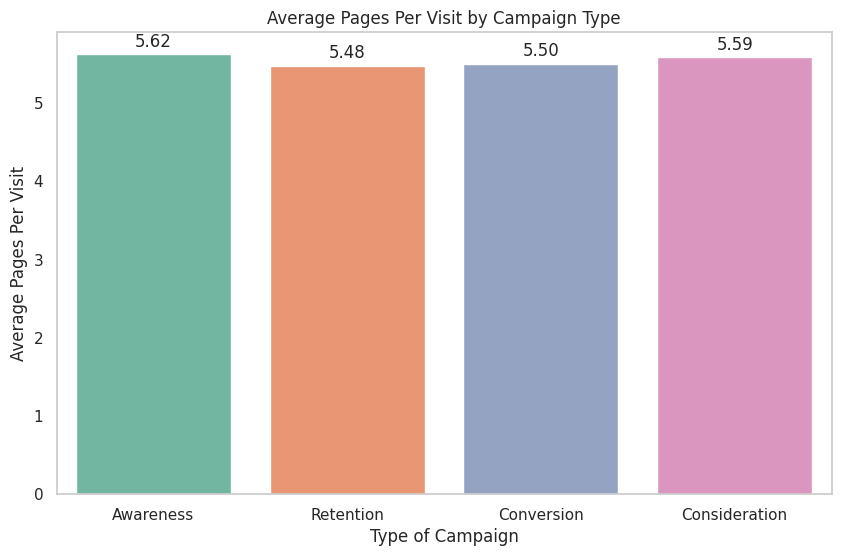

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="CampaignType", y="PagesPerVisit", data=data, ci=None, palette='Set2')
plt.title('Average Pages Per Visit by Campaign Type')
plt.xlabel('Type of Campaign')
plt.ylabel('Average Pages Per Visit')

# Adding average values ​​above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
    
plt.grid(False)
plt.show()

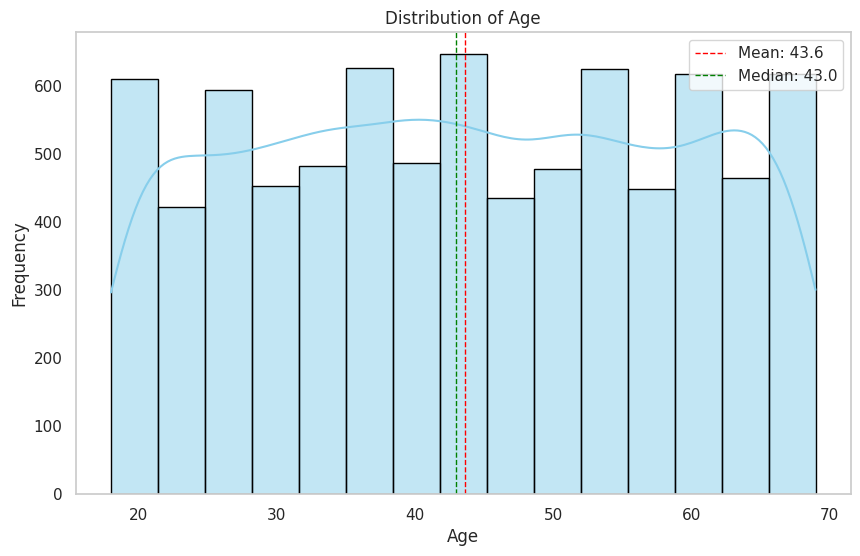

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=15, kde=True, color='skyblue', edgecolor='black')  # Adicionando KDE
mean_age = data['Age'].mean()
median_age = data['Age'].median()

plt.axvline(mean_age, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='--', linewidth=1, label=f'Median: {median_age:.1f}')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

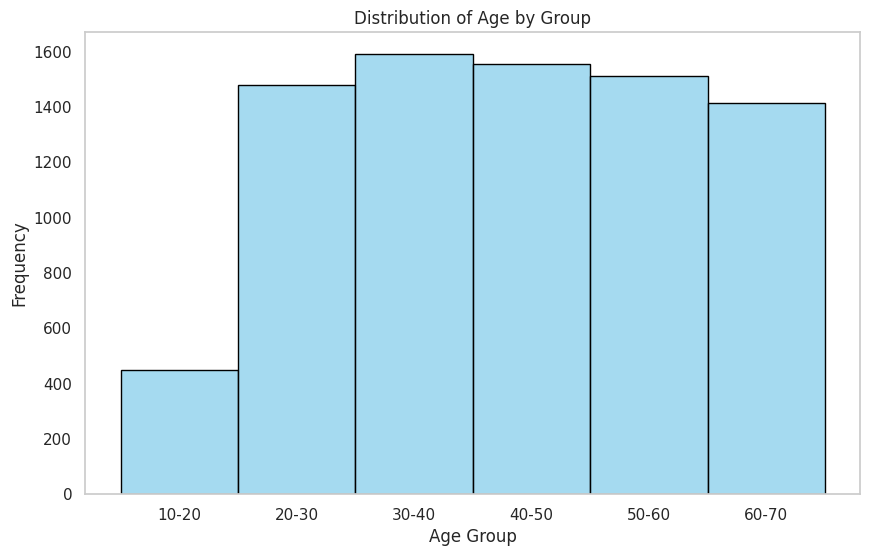

In [13]:
plt.figure(figsize=(10, 6))
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

sns.histplot(data['AgeGroup'], color='skyblue', edgecolor='black')
plt.title('Distribution of Age by Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

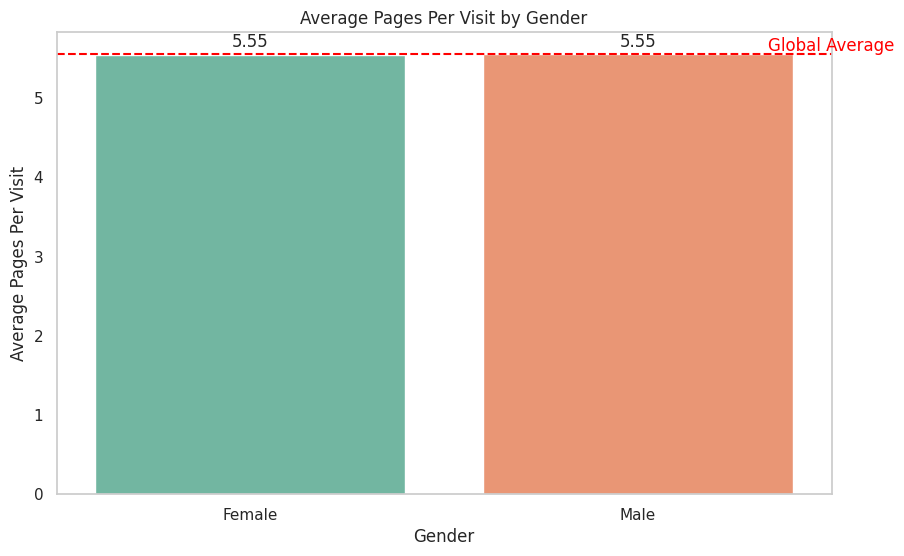

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Gender", y="PagesPerVisit", data=data, ci=None, palette='Set2')
plt.title('Average Pages Per Visit by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Pages Per Visit')

# Adding average values above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
    
# Adding a global average line
mean_value = data['PagesPerVisit'].mean()
ax.axhline(mean_value, color='red', linestyle='--')
ax.text(1.5, mean_value + 0.05, 'Global Average', color='red', ha='center')

plt.grid(False)
plt.show()

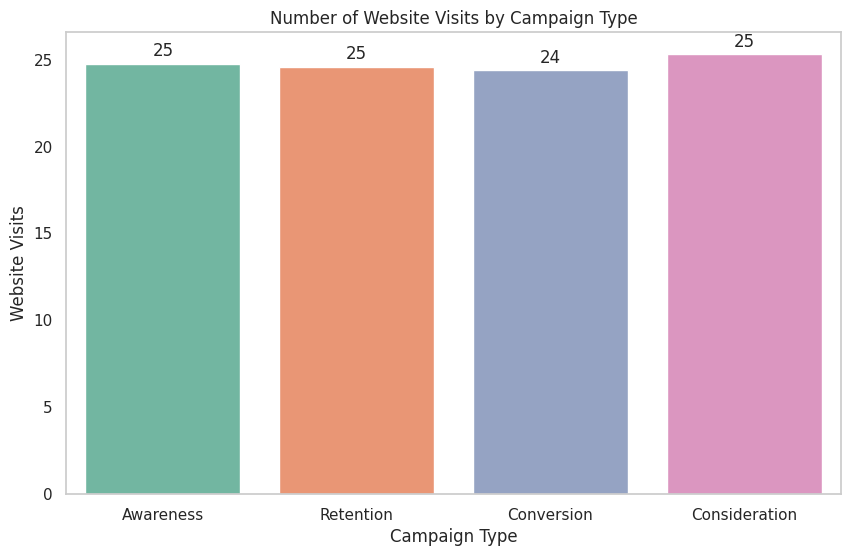

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="CampaignType", y="WebsiteVisits", data=data, ci=None, palette='Set2')
plt.title('Number of Website Visits by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Website Visits')

# Adding average values above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.grid(False)
plt.show()

ROAS by AdSpend bin:
AdSpend_bins
Low          52.495728
Medium       18.688141
High         12.563007
Very High     9.051975
dtype: float64


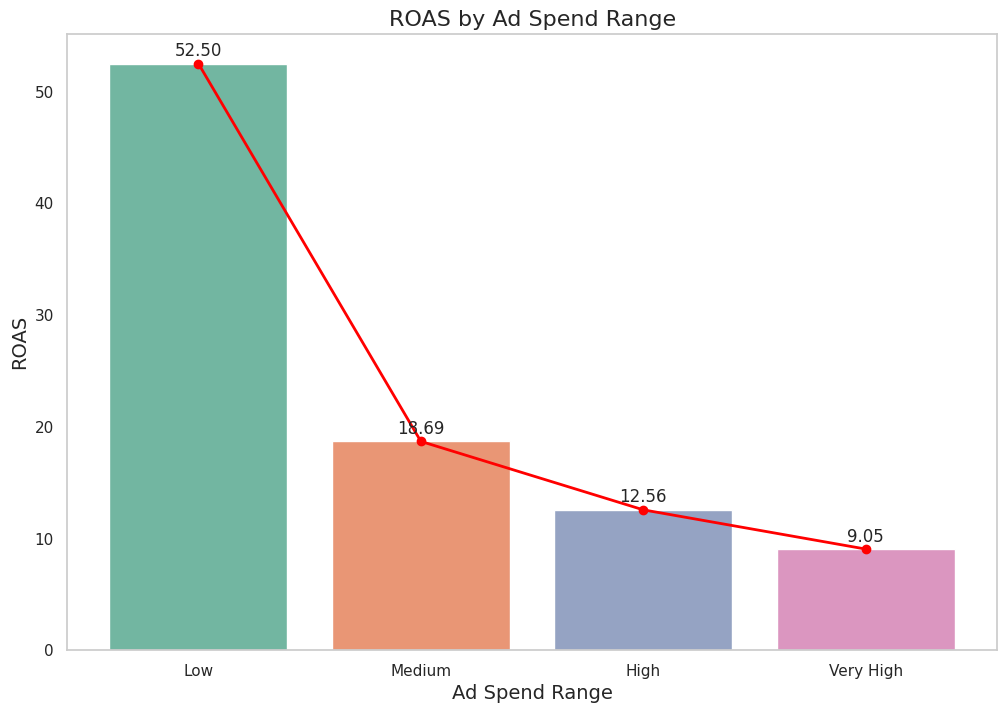

In [16]:
# Calculating ROAS for different AdSpend bins
data['AdSpend_bins'] = pd.qcut(data['AdSpend'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
roas = data.groupby('AdSpend_bins').apply(lambda x: (x['Conversion'].sum() * x['Income'].mean()) / x['AdSpend'].sum())
print("ROAS by AdSpend bin:")
print(roas)

# Assuming 'roas' is a Pandas Series with ROAS values
plt.figure(figsize=(12, 8))

# Bar chart for ROAS
ax = sns.barplot(x=roas.index, y=roas.values, palette='Set2')
plt.title('ROAS by Ad Spend Range', fontsize=16)
plt.xlabel('Ad Spend Range', fontsize=14)
plt.ylabel('ROAS', fontsize=14)

# Adding exact values above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',xytext = (0, 9),
                textcoords = 'offset points')

# Adding a red line connecting the ROAS values
plt.plot(roas.index, roas.values, color='red', marker='o', linewidth=2) 
plt.grid(False) 
plt.show()

Conversion Rate by Marketing Channel:
CampaignChannel
Referral        0.883072
PPC             0.882779
SEO             0.876774
Email           0.870263
Social Media    0.868334
Name: Conversion, dtype: float64


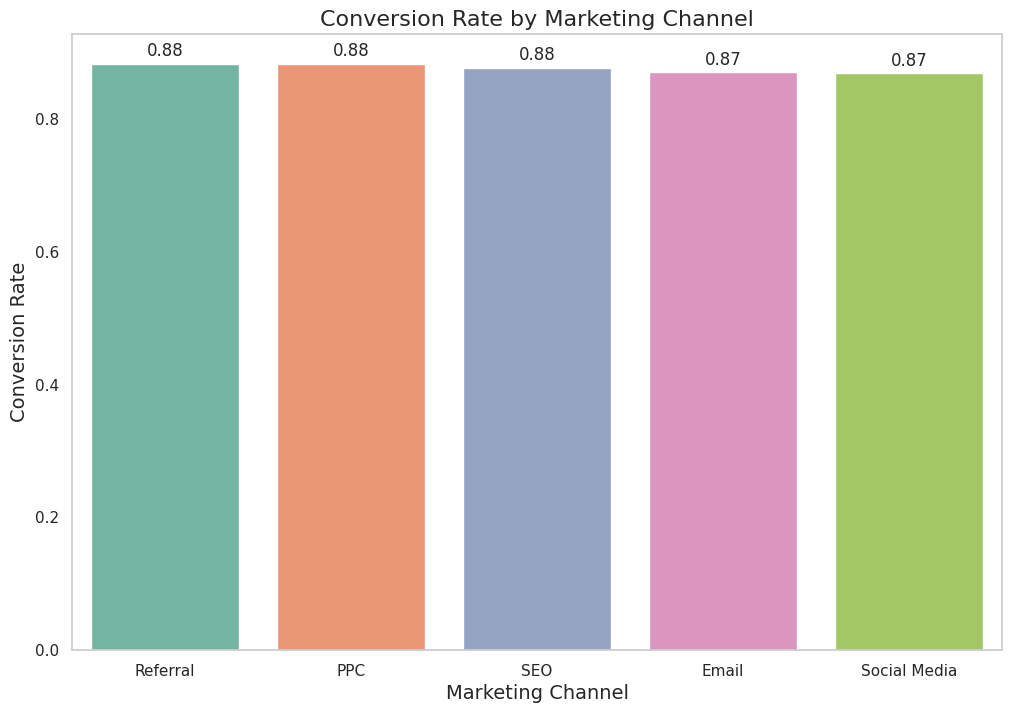

In [17]:
# Conversion rate by marketing channel
conversion_rate_by_channel = data.groupby('CampaignChannel')['Conversion'].mean().sort_values(ascending=False)
print("Conversion Rate by Marketing Channel:")
print(conversion_rate_by_channel)

# Create a bar chart for conversion rate by marketing channel
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=conversion_rate_by_channel.index, y=conversion_rate_by_channel.values, palette='Set2')
plt.title('Conversion Rate by Marketing Channel', fontsize=16)
plt.xlabel('Marketing Channel', fontsize=14)
plt.ylabel('Conversion Rate', fontsize=14)

# Adding exact values above the bars
for p in ax.patches: 
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points') 
plt.grid(False)
plt.show()

Average Loyalty Score by Conversion:
Conversion
0    2128.483806
1    2541.244438
Name: LoyaltyPoints, dtype: float64


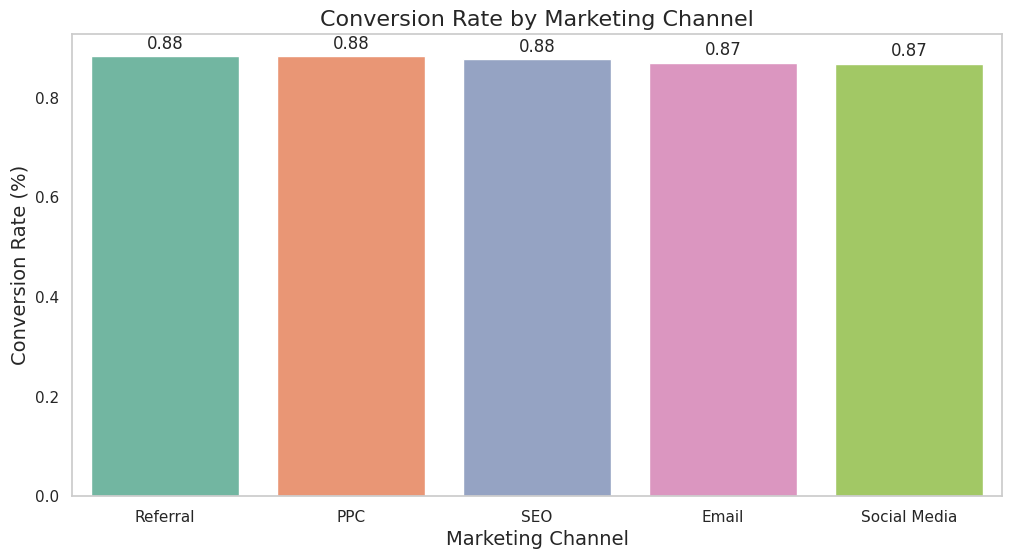

In [18]:
# Average loyalty score for converted vs. lost customers not converted
loyalty_points_by_conversion = data.groupby('Conversion')['LoyaltyPoints'].mean()
print("Average Loyalty Score by Conversion:")
print(loyalty_points_by_conversion)

# Bar chart for average loyalty score by conversion
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=conversion_rate_by_channel.index, y=conversion_rate_by_channel.values, palette='Set2', ci=None)
plt.title('Conversion Rate by Marketing Channel', fontsize=16)
plt.xlabel('Marketing Channel', fontsize=14)
plt.ylabel('Conversion Rate (%)', fontsize=14)

# Adding exact values ​​above the bars
for p in ax.patches: 
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points') 
plt.grid(False) 
plt.show()

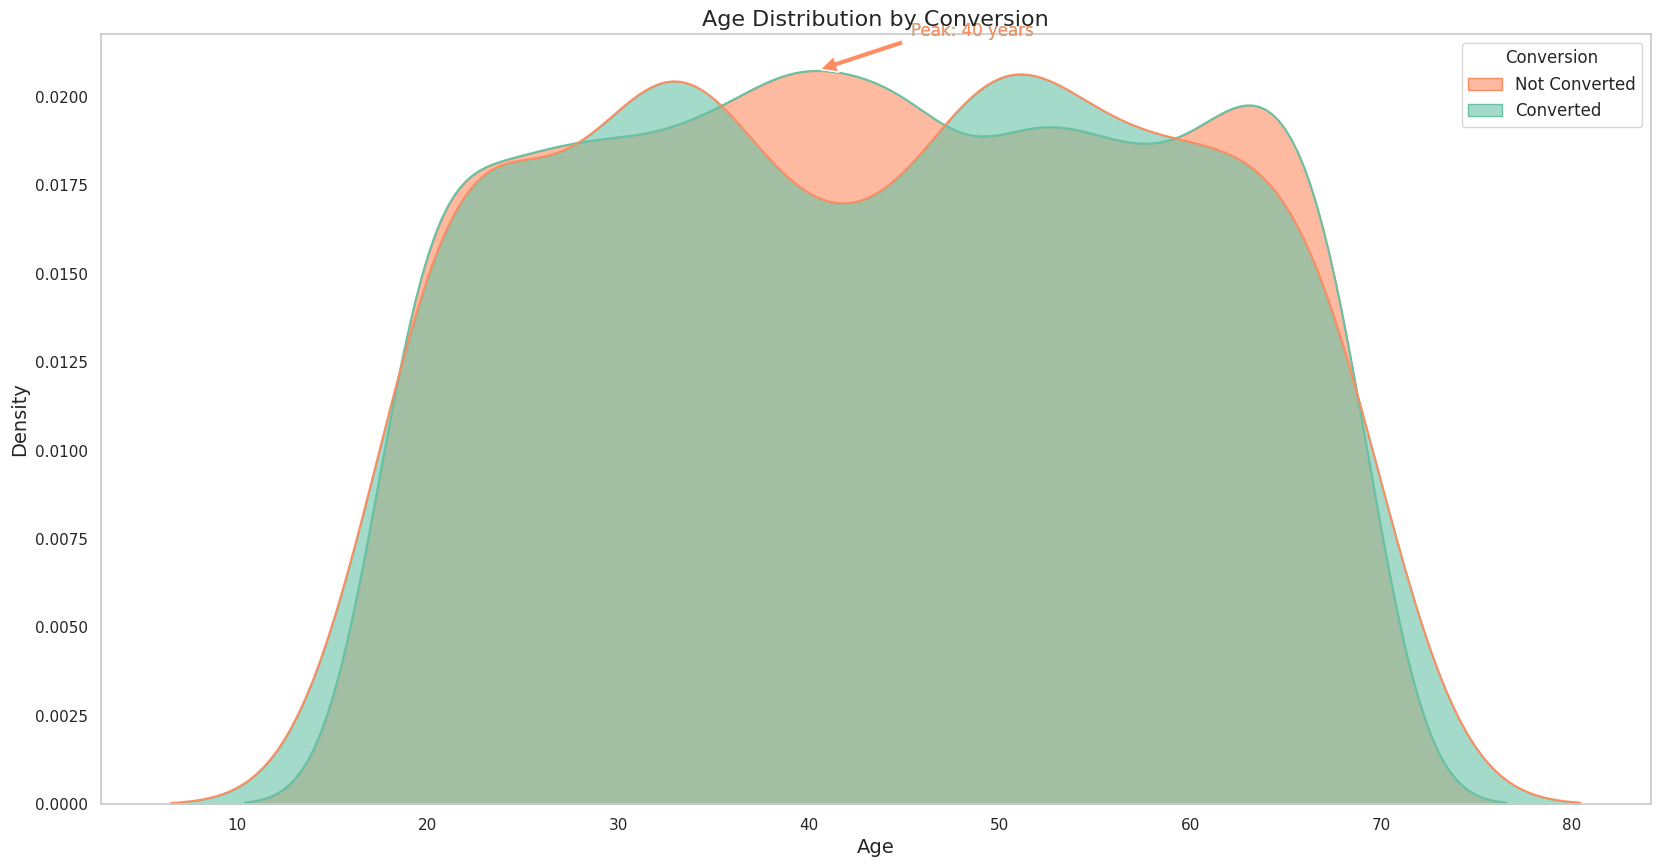

In [19]:
plt.figure(figsize=(20, 10))
ax = sns.kdeplot(data=data, x='Age', hue='Conversion', fill=True, palette='Set2', common_norm=False, alpha=0.6)
plt.title('Age Distribution by Conversion', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Conversion', labels=['Not Converted', 'Converted'], fontsize=12)

# Calculating the peaks (mode) of the age distributions for each conversion group
for conversion, color in zip(data['Conversion'].unique(), sns.color_palette('Set2')):
    kde = sns.kdeplot(data=data[data['Conversion'] == conversion], x='Age', fill=False, color=color)
    peak_age = kde.get_lines()[0].get_data()[0][np.argmax(kde.get_lines()[0].get_data()[1])]
    peak_density = np.max(kde.get_lines()[0].get_data()[1])
    
    # Annotating the peak on the plot
    ax.annotate(f'Peak: {int(peak_age)} years', 
                xy=(peak_age, peak_density), 
                xytext=(peak_age + 5, peak_density + 0.001),
                arrowprops=dict(facecolor=color, shrink=0.05),
                fontsize=12, color=color)

plt.grid(False)
plt.legend(title='Conversion', labels=['Not Converted', 'Converted'], fontsize=12)
plt.show()

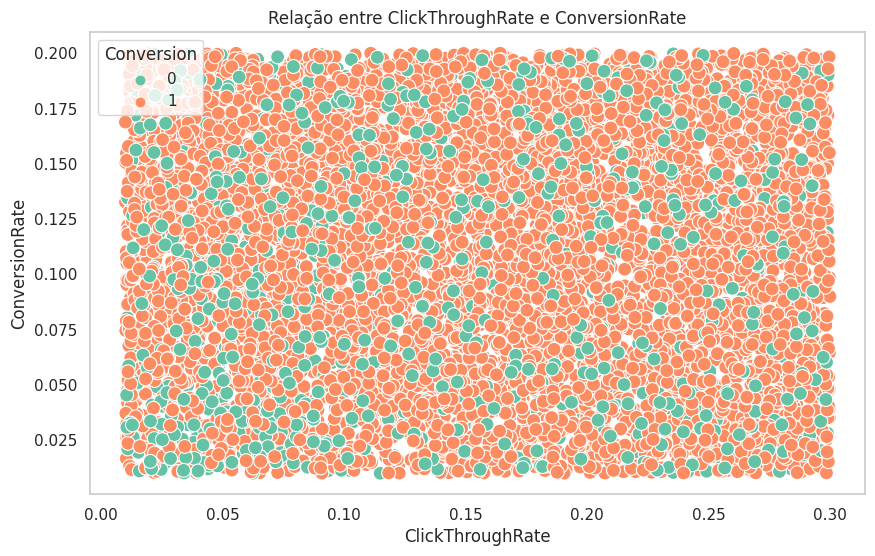

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='ClickThroughRate', y='ConversionRate', hue='Conversion', palette='Set2', s=100)
plt.title('Relação entre ClickThroughRate e ConversionRate')
plt.xlabel('ClickThroughRate')
plt.ylabel('ConversionRate')
plt.grid(False)
plt.show()

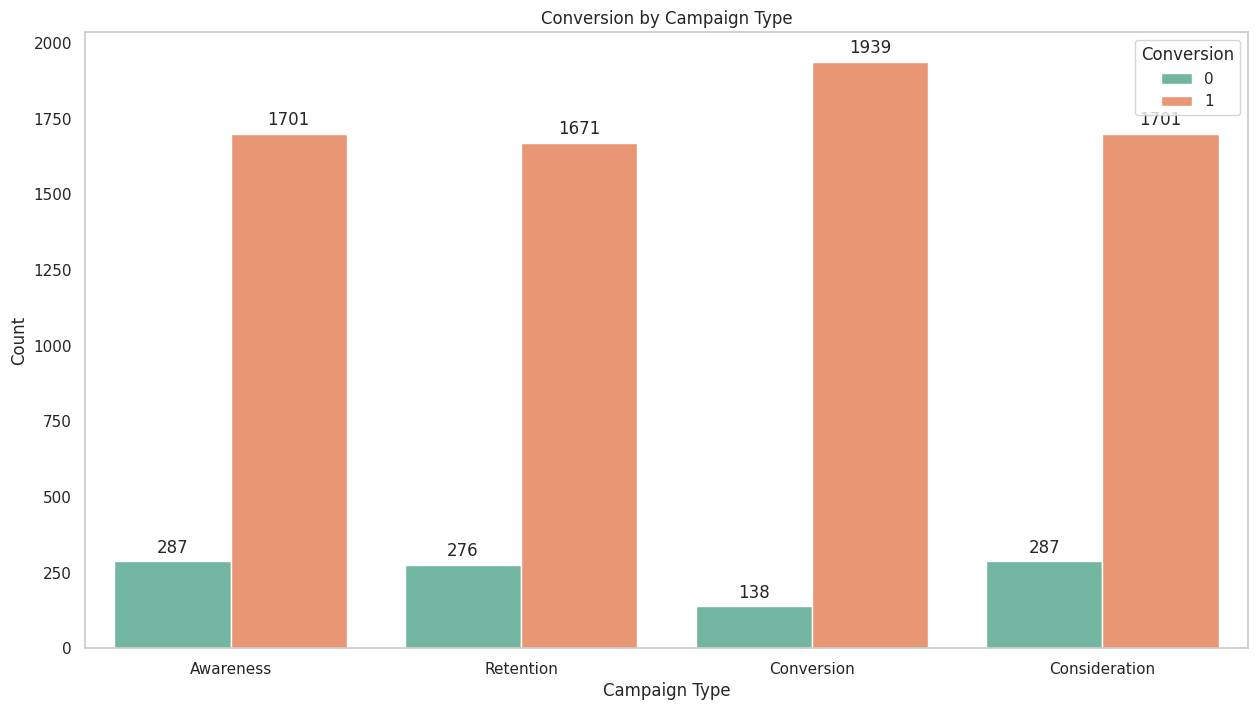

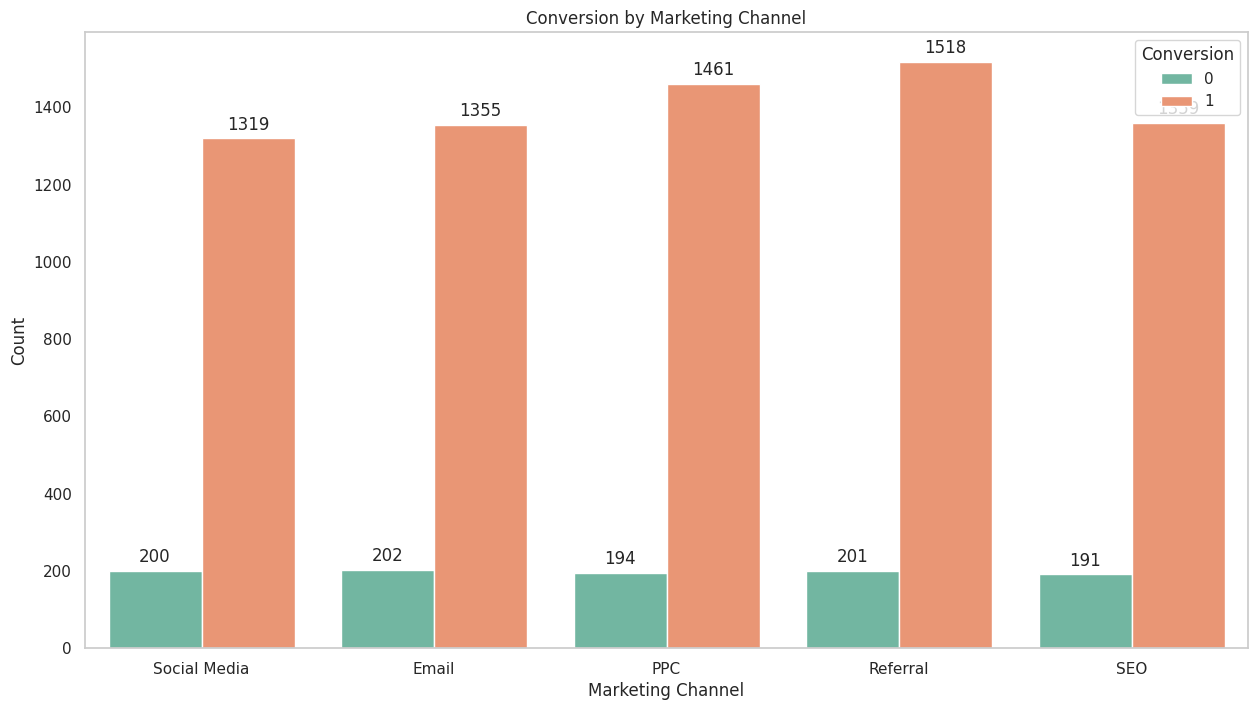

In [21]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=data, x='CampaignType', hue='Conversion', palette='Set2')
plt.title('Conversion by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Count')

# Adding annotations to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.grid(False)
plt.show()

plt.figure(figsize=(15, 8))
ax = sns.countplot(data=data, x='CampaignChannel', hue='Conversion', palette='Set2')
plt.title('Conversion by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Count')

# Adding annotations to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.grid(False)
plt.show()

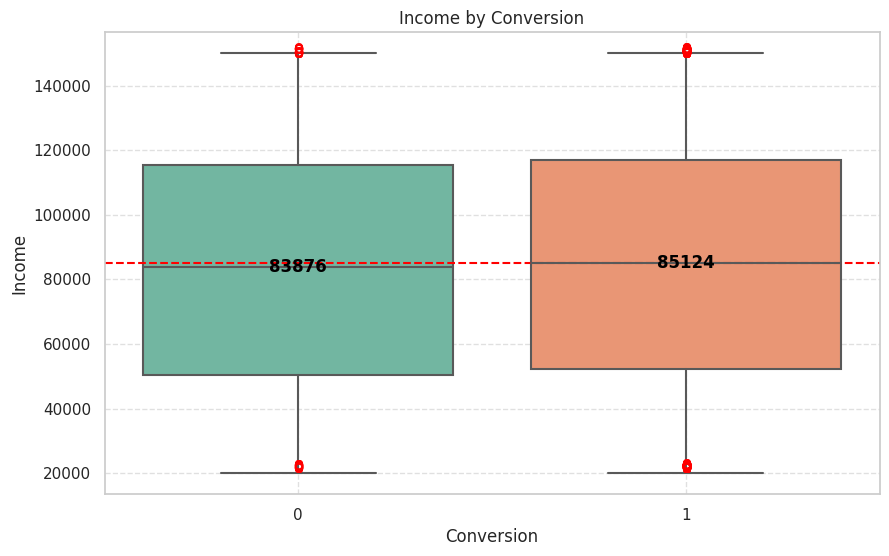

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Conversion', y='Income', palette='Set2')
plt.title('Income by Conversion')
plt.xlabel('Conversion')
plt.ylabel('Income')

# Calculando as medianas e anotando-as no gráfico
medians = data.groupby(['Conversion'])['Income'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.0f}', ha='center', va='center', fontweight='bold', color='black')
    
# Destaque para outliers (opcional)
outliers = data[(data['Income'] > data['Income'].quantile(0.99)) | (data['Income'] < data['Income'].quantile(0.01))]
for i, row in outliers.iterrows():
    plt.text(row['Conversion'], row['Income'], 'o', color='red', ha='center')
    
# Linha de mediana global
global_median = data['Income'].median()
plt.axhline(global_median, color='red', linestyle='--', label=f'Global Median: {global_median:.0f}')
plt.grid(False, linestyle='--', alpha=0.6)
plt.show()

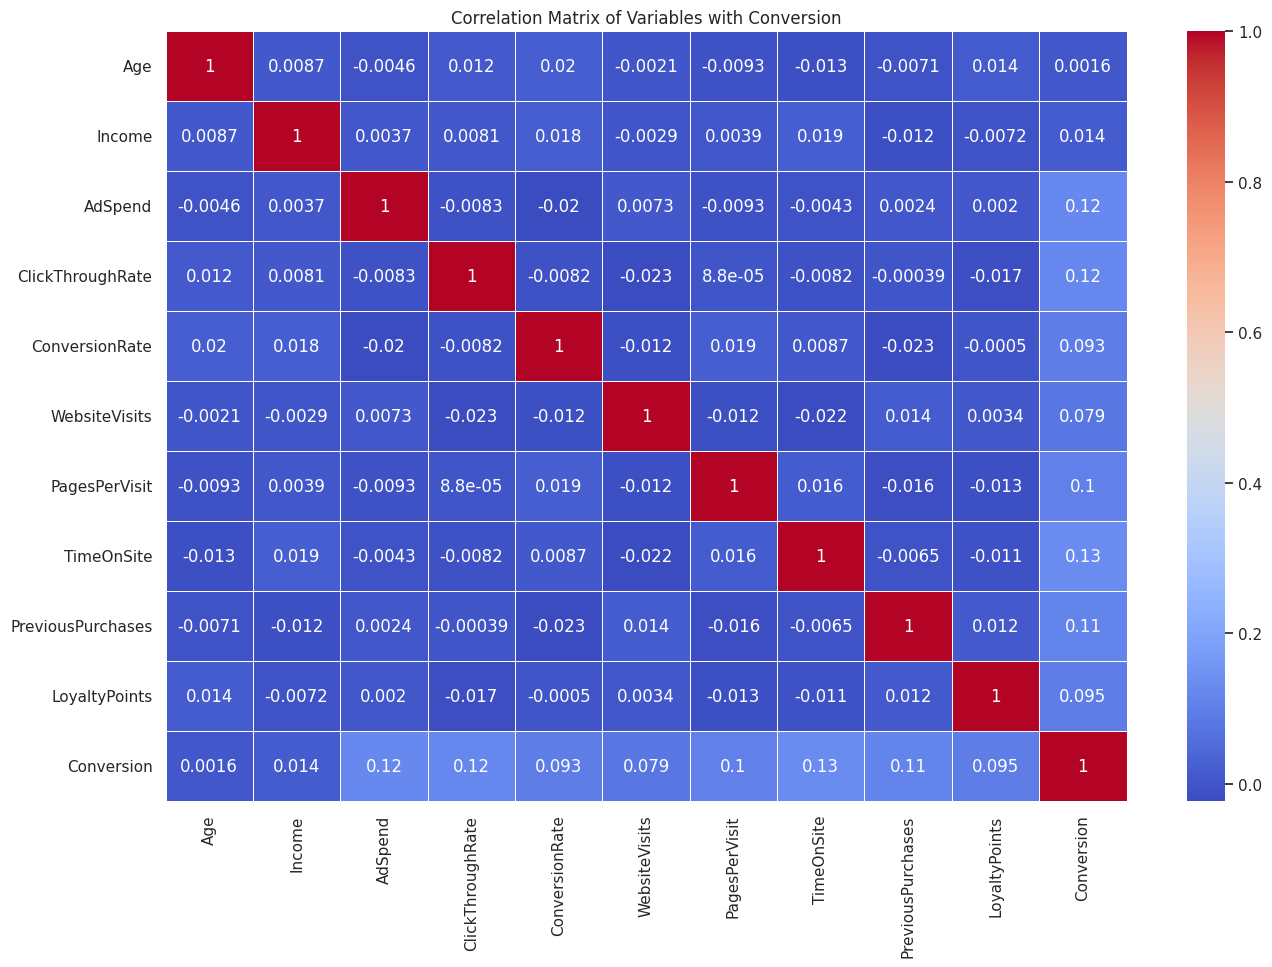

In [23]:
plt.figure(figsize=(15.5, 10))
corr_matrix = data[['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Variables with Conversion')
plt.show()

The correlation matrix you provided shows the correlation coefficients between various features and the target variable `Conversion`. Here's a breakdown of the key observations:

1. **Correlation with Conversion:**
   - **AdSpend (0.12):** There is a moderate positive correlation between `AdSpend` and `Conversion`. This suggests that higher spending on ads is somewhat associated with a higher likelihood of conversion.
   - **ClickThroughRate (0.12):** `ClickThroughRate` also has a moderate positive correlation with `Conversion`, indicating that as the click-through rate increases, the likelihood of conversion slightly increases as well.
   - **TimeOnSite (0.13):** Time spent on the website has a slightly stronger correlation with `Conversion`, suggesting that users who spend more time on the site are more likely to convert.
   - **PagesPerVisit (0.10):** The number of pages visited per session shows a small positive correlation with conversion, indicating that users who browse more pages are marginally more likely to convert.
   - **ConversionRate (0.093):** This shows a weak positive correlation, which is expected as it is related directly to conversion.
   - **LoyaltyPoints (0.095):** Loyalty points are also weakly correlated with conversion, implying that customers who convert might have a slightly higher tendency to accumulate loyalty points.

2. **Inter-feature Correlations:**
   - **Income and Age:** These two variables have a very low positive correlation (0.0087), indicating that there is almost no relationship between a customer's age and income in this dataset.
   - **PagesPerVisit and TimeOnSite:** The correlation (0.016) is positive but very low, suggesting that visiting more pages doesn’t necessarily mean spending more time on the site.
   - **PreviousPurchases and LoyaltyPoints:** The correlation (0.012) is positive and very weak, suggesting that customers who make previous purchases might accumulate loyalty points, but the relationship is not strong.

3. **Low Correlation Values:**
   - Most of the correlations between the features themselves are quite low, typically near 0, which suggests that there is minimal multicollinearity among the features. This is generally good for regression models, as it indicates that the features are not highly dependent on each other.

### Key Insights:
- The features `AdSpend`, `ClickThroughRate`, and `TimeOnSite` show the highest positive correlations with `Conversion`, though these correlations are still relatively weak. This suggests that while these factors are associated with higher conversion rates, they are not strong predictors on their own.
- The weak correlations between most of the variables suggest that each variable might contribute uniquely to the conversion prediction, which could be beneficial when building a predictive model.

### Conclusion:
While some variables show positive correlations with conversion, the overall weak correlations imply that no single variable strongly drives conversion on its own. This indicates that a combination of multiple factors is likely necessary to accurately predict conversion, and machine learning models that consider the interactions between these variables may be more effective than relying on any single metric.

### Positive Correlations Analysis

The positive correlations you provided suggest certain relationships between the variables in your dataset. Let's analyze each pair of correlated variables:

1. **Income x Age (0.087):**
   - There is a weak positive correlation between `Income` and `Age`. This suggests that as age increases, income slightly increases as well. However, the correlation is quite low, indicating that age alone is not a strong predictor of income in this dataset.

2. **Income x ClickThroughRate (0.081):**
   - This weak positive correlation indicates that customers with higher incomes tend to have a slightly higher click-through rate. Again, while there is a relationship, it is not particularly strong.

3. **AdSpend x WebsiteVisits (0.073):**
   - The positive correlation here suggests that higher ad spending is associated with a slight increase in website visits. This makes intuitive sense as more advertising typically leads to more traffic, but the low correlation indicates that other factors also play a significant role in driving website visits.

4. **ClickThroughRate x Income (0.081):**
   - Reiterating from point 2, this suggests that wealthier customers tend to click on ads slightly more often, but this relationship is weak.

5. **ConversionRate x TimeOnSite (0.087):**
   - There is a weak positive correlation between `ConversionRate` and `TimeOnSite`, implying that customers who spend more time on the site are slightly more likely to convert. This is expected, as more engaged users (those who spend more time) are generally more likely to take action.

6. **ConversionRate x ConversionRate (0.093):**
   - This indicates a strong internal consistency within the `ConversionRate` variable itself, which is expected.

7. **WebsiteVisits x ConversionRate (0.079):**
   - A weak positive correlation suggests that more website visits are slightly associated with a higher conversion rate. This makes sense, as more visits provide more opportunities for conversion, but the weak correlation indicates that merely driving traffic is not enough to ensure conversions.

8. **TimeOnSite x ConversionRate (0.087):**
   - Reiterating from point 5, this correlation suggests that the amount of time spent on the site has a positive relationship with the conversion rate.

9. **LoyaltyPoints x Conversion (0.095):**
   - There is a weak positive correlation between `LoyaltyPoints` and `Conversion`. This suggests that customers who convert are slightly more likely to accumulate loyalty points, which could indicate that loyal customers are more likely to convert, or that conversions lead to the earning of loyalty points.

10. **Conversion x ConversionRate (0.093):**
    - This strong positive correlation is expected as `Conversion` and `ConversionRate` are directly related.

11. **Conversion x WebsiteVisits (0.079):**
    - This weak positive correlation suggests that customers who convert tend to visit the website more often, but again, the correlation is low, indicating that frequent visits alone do not guarantee conversion.

12. **Conversion x LoyaltyPoints (0.095):**
    - Reiterating from point 9, this suggests a weak relationship where customers who convert tend to accumulate more loyalty points.

### Summary:
- **Overall Weak Correlations:** The correlations are generally weak, suggesting that while there are relationships between these variables, they are not strong predictors on their own.
- **Insight into Behavior:** Variables like `TimeOnSite`, `WebsiteVisits`, and `LoyaltyPoints` have some association with conversion-related metrics, hinting at customer engagement and loyalty playing a role in conversions, though not in a dominant way.
- **Implications for Modeling:** These weak correlations suggest that a model predicting conversion should likely consider multiple factors together rather than relying on any single metric.

For more accurate predictions or insights, these variables may need to be combined into a more complex model that captures interactions and non-linear relationships, which are not evident through simple correlations.

# Part 3.2) Indicators

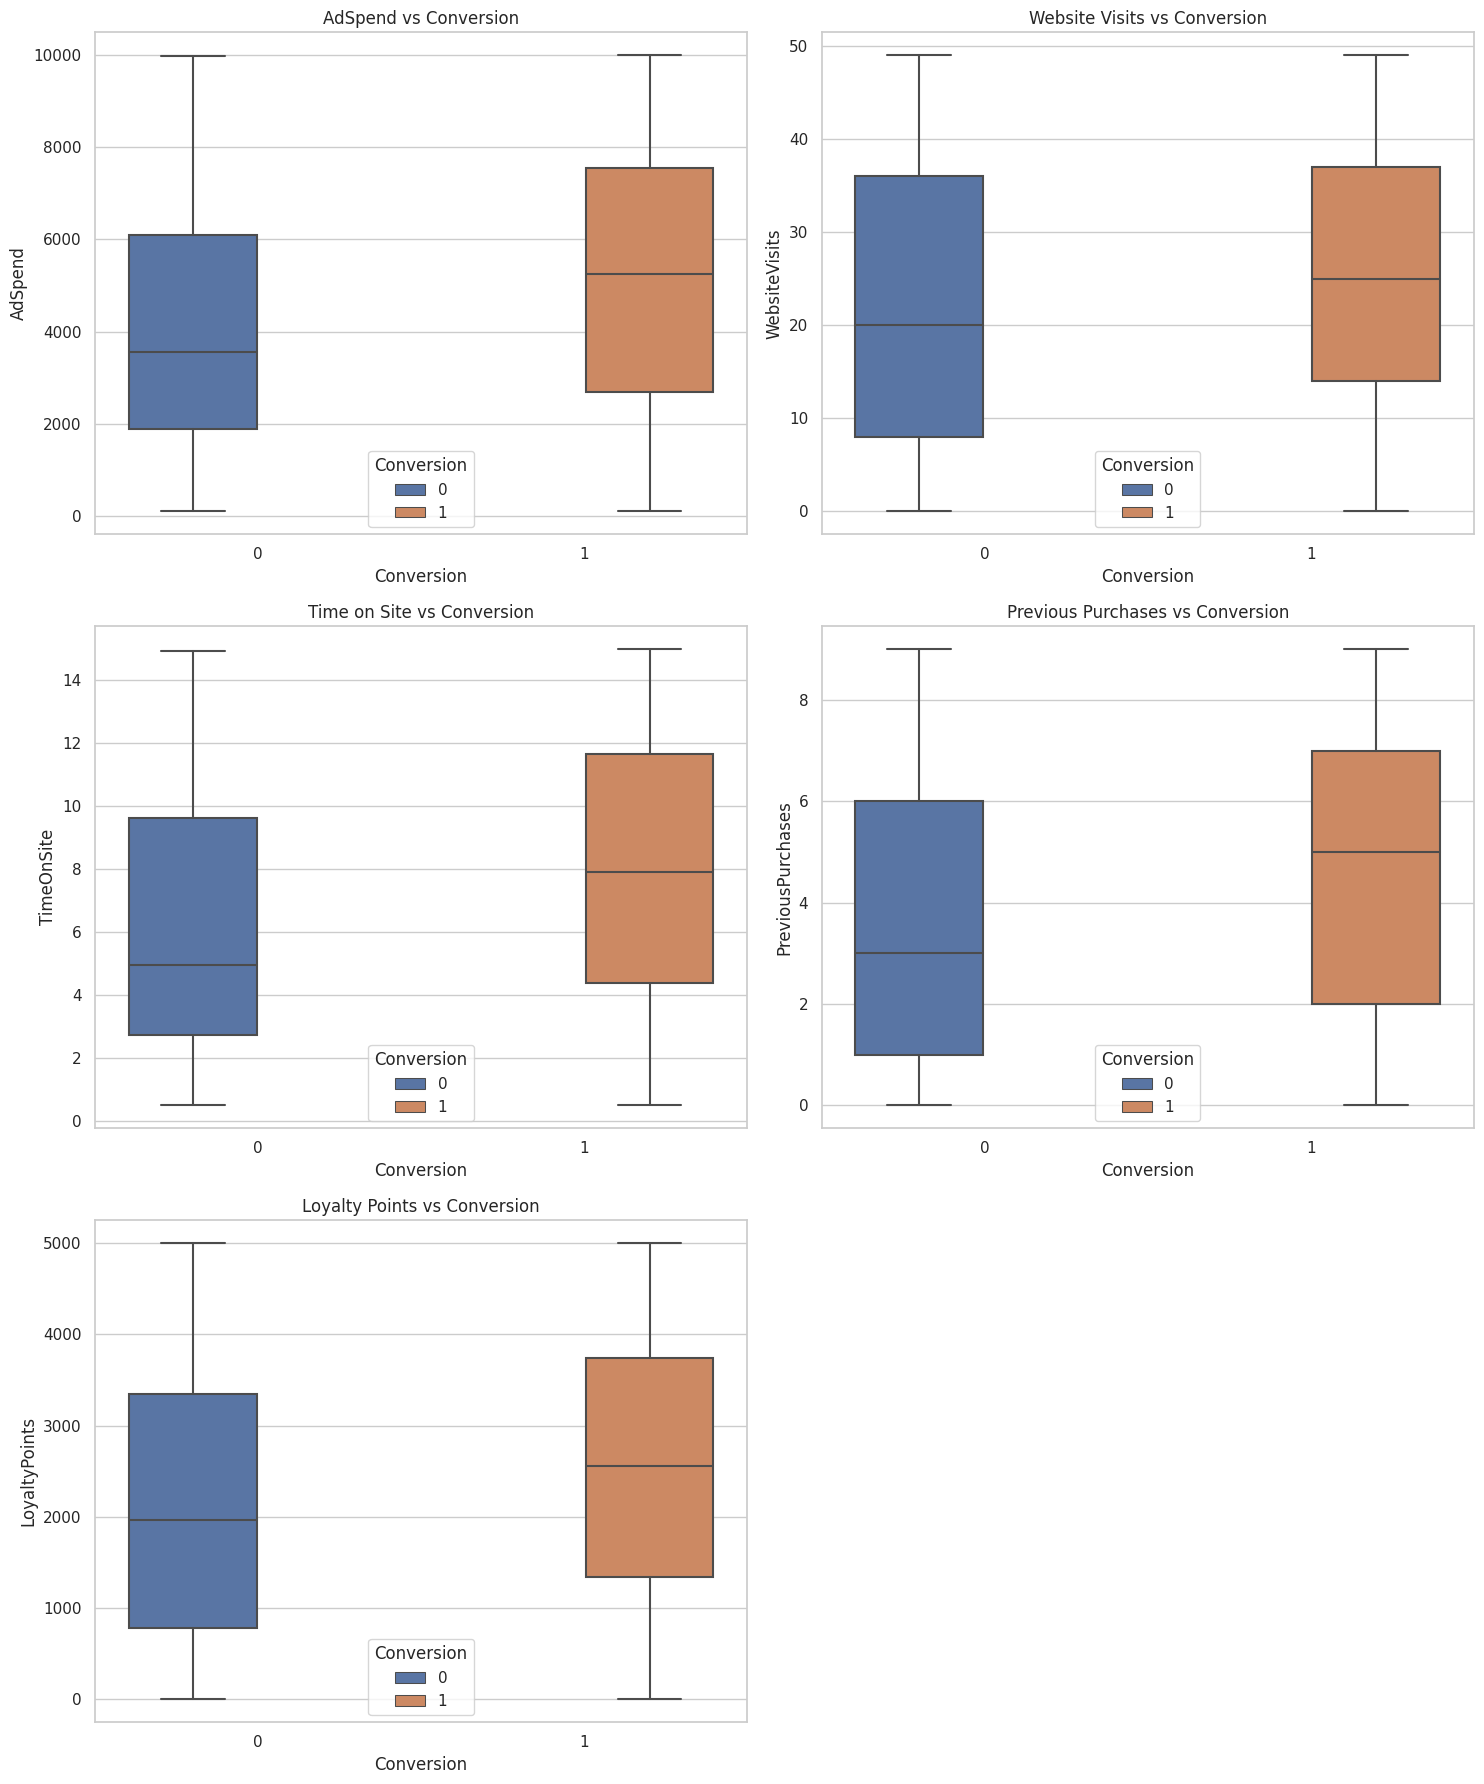

In [24]:
# Creating subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Boxplot for AdSpend vs Conversion
sns.boxplot(x='Conversion', y='AdSpend', data=data, hue='Conversion', ax=axes[0, 0])
axes[0, 0].set_title('AdSpend vs Conversion')

# Boxplot for WebsiteVisits vs Conversion
sns.boxplot(x='Conversion', y='WebsiteVisits', data=data, hue='Conversion', ax=axes[0, 1])
axes[0, 1].set_title('Website Visits vs Conversion')

# Boxplot for TimeOnSite vs Conversion
sns.boxplot(x='Conversion', y='TimeOnSite', data=data, hue='Conversion', ax=axes[1, 0])
axes[1, 0].set_title('Time on Site vs Conversion')

# Boxplot for PreviousPurchases vs Conversion
sns.boxplot(x='Conversion', y='PreviousPurchases', data=data, hue='Conversion', ax=axes[1, 1])
axes[1, 1].set_title('Previous Purchases vs Conversion')

# Boxplot for LoyaltyPoints vs Conversion
sns.boxplot(x='Conversion', y='LoyaltyPoints', data=data, hue='Conversion', ax=axes[2, 0])
axes[2, 0].set_title('Loyalty Points vs Conversion')

# Remove the empty subplot (axes[2, 1])
fig.delaxes(axes[2, 1])

# Adjusting the layout for better visualization
plt.tight_layout()

# Displaying the subplots
plt.show()

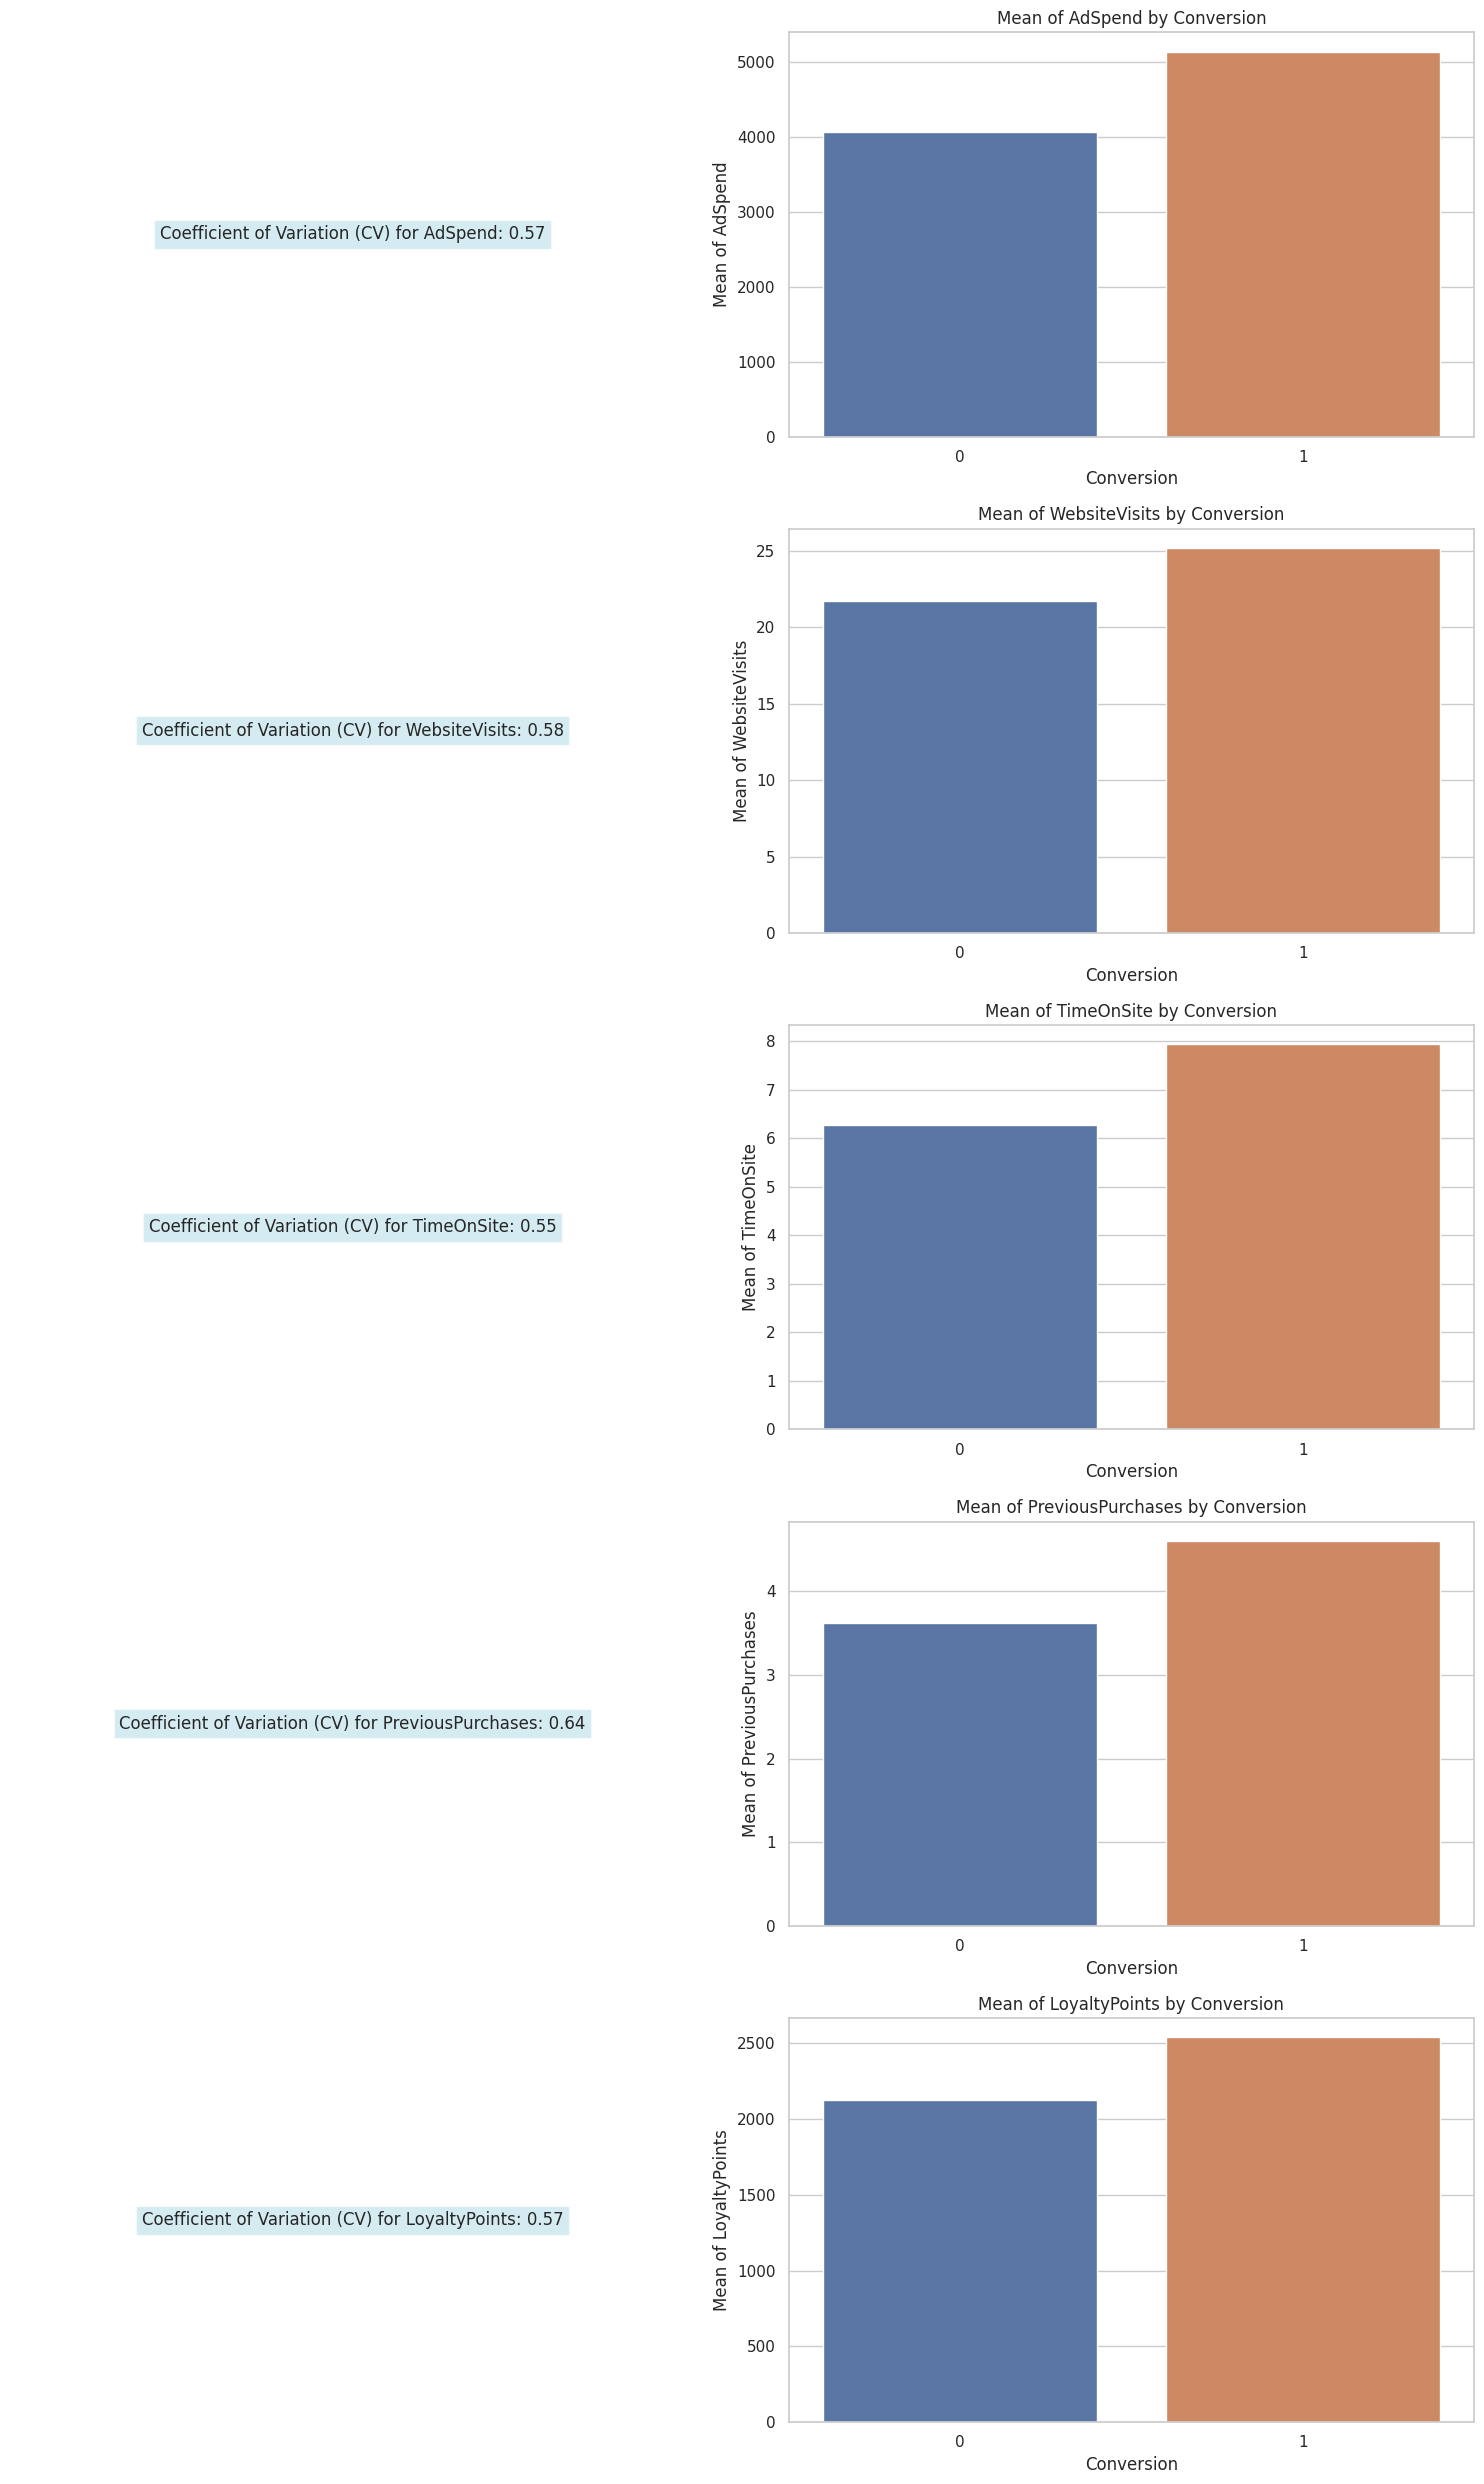

In [25]:
# List of variables to calculate the indicators
variables = ['AdSpend', 'WebsiteVisits', 'TimeOnSite', 'PreviousPurchases', 'LoyaltyPoints']

# Creating subplots
fig, axes = plt.subplots(len(variables), 2, figsize=(15, 5 * len(variables)))

# Loop to calculate indicators and create plots
for i, var in enumerate(variables):
    # Coefficient of Variation (CV)
    cv = data[var].std() / data[var].mean()
    
    # Mean by conversion
    mean_conversion = data.groupby('Conversion')[var].mean()

    # Display Coefficient of Variation
    axes[i, 0].text(0.5, 0.5, f'Coefficient of Variation (CV) for {var}: {cv:.2f}', 
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
    axes[i, 0].axis('off')

    # Barplot for mean by conversion
    sns.barplot(x=mean_conversion.index, y=mean_conversion.values, ax=axes[i, 1])
    axes[i, 1].set_title(f'Mean of {var} by Conversion')
    axes[i, 1].set_xlabel('Conversion')
    axes[i, 1].set_ylabel(f'Mean of {var}')

# Adjusting layout
plt.tight_layout()
plt.show()

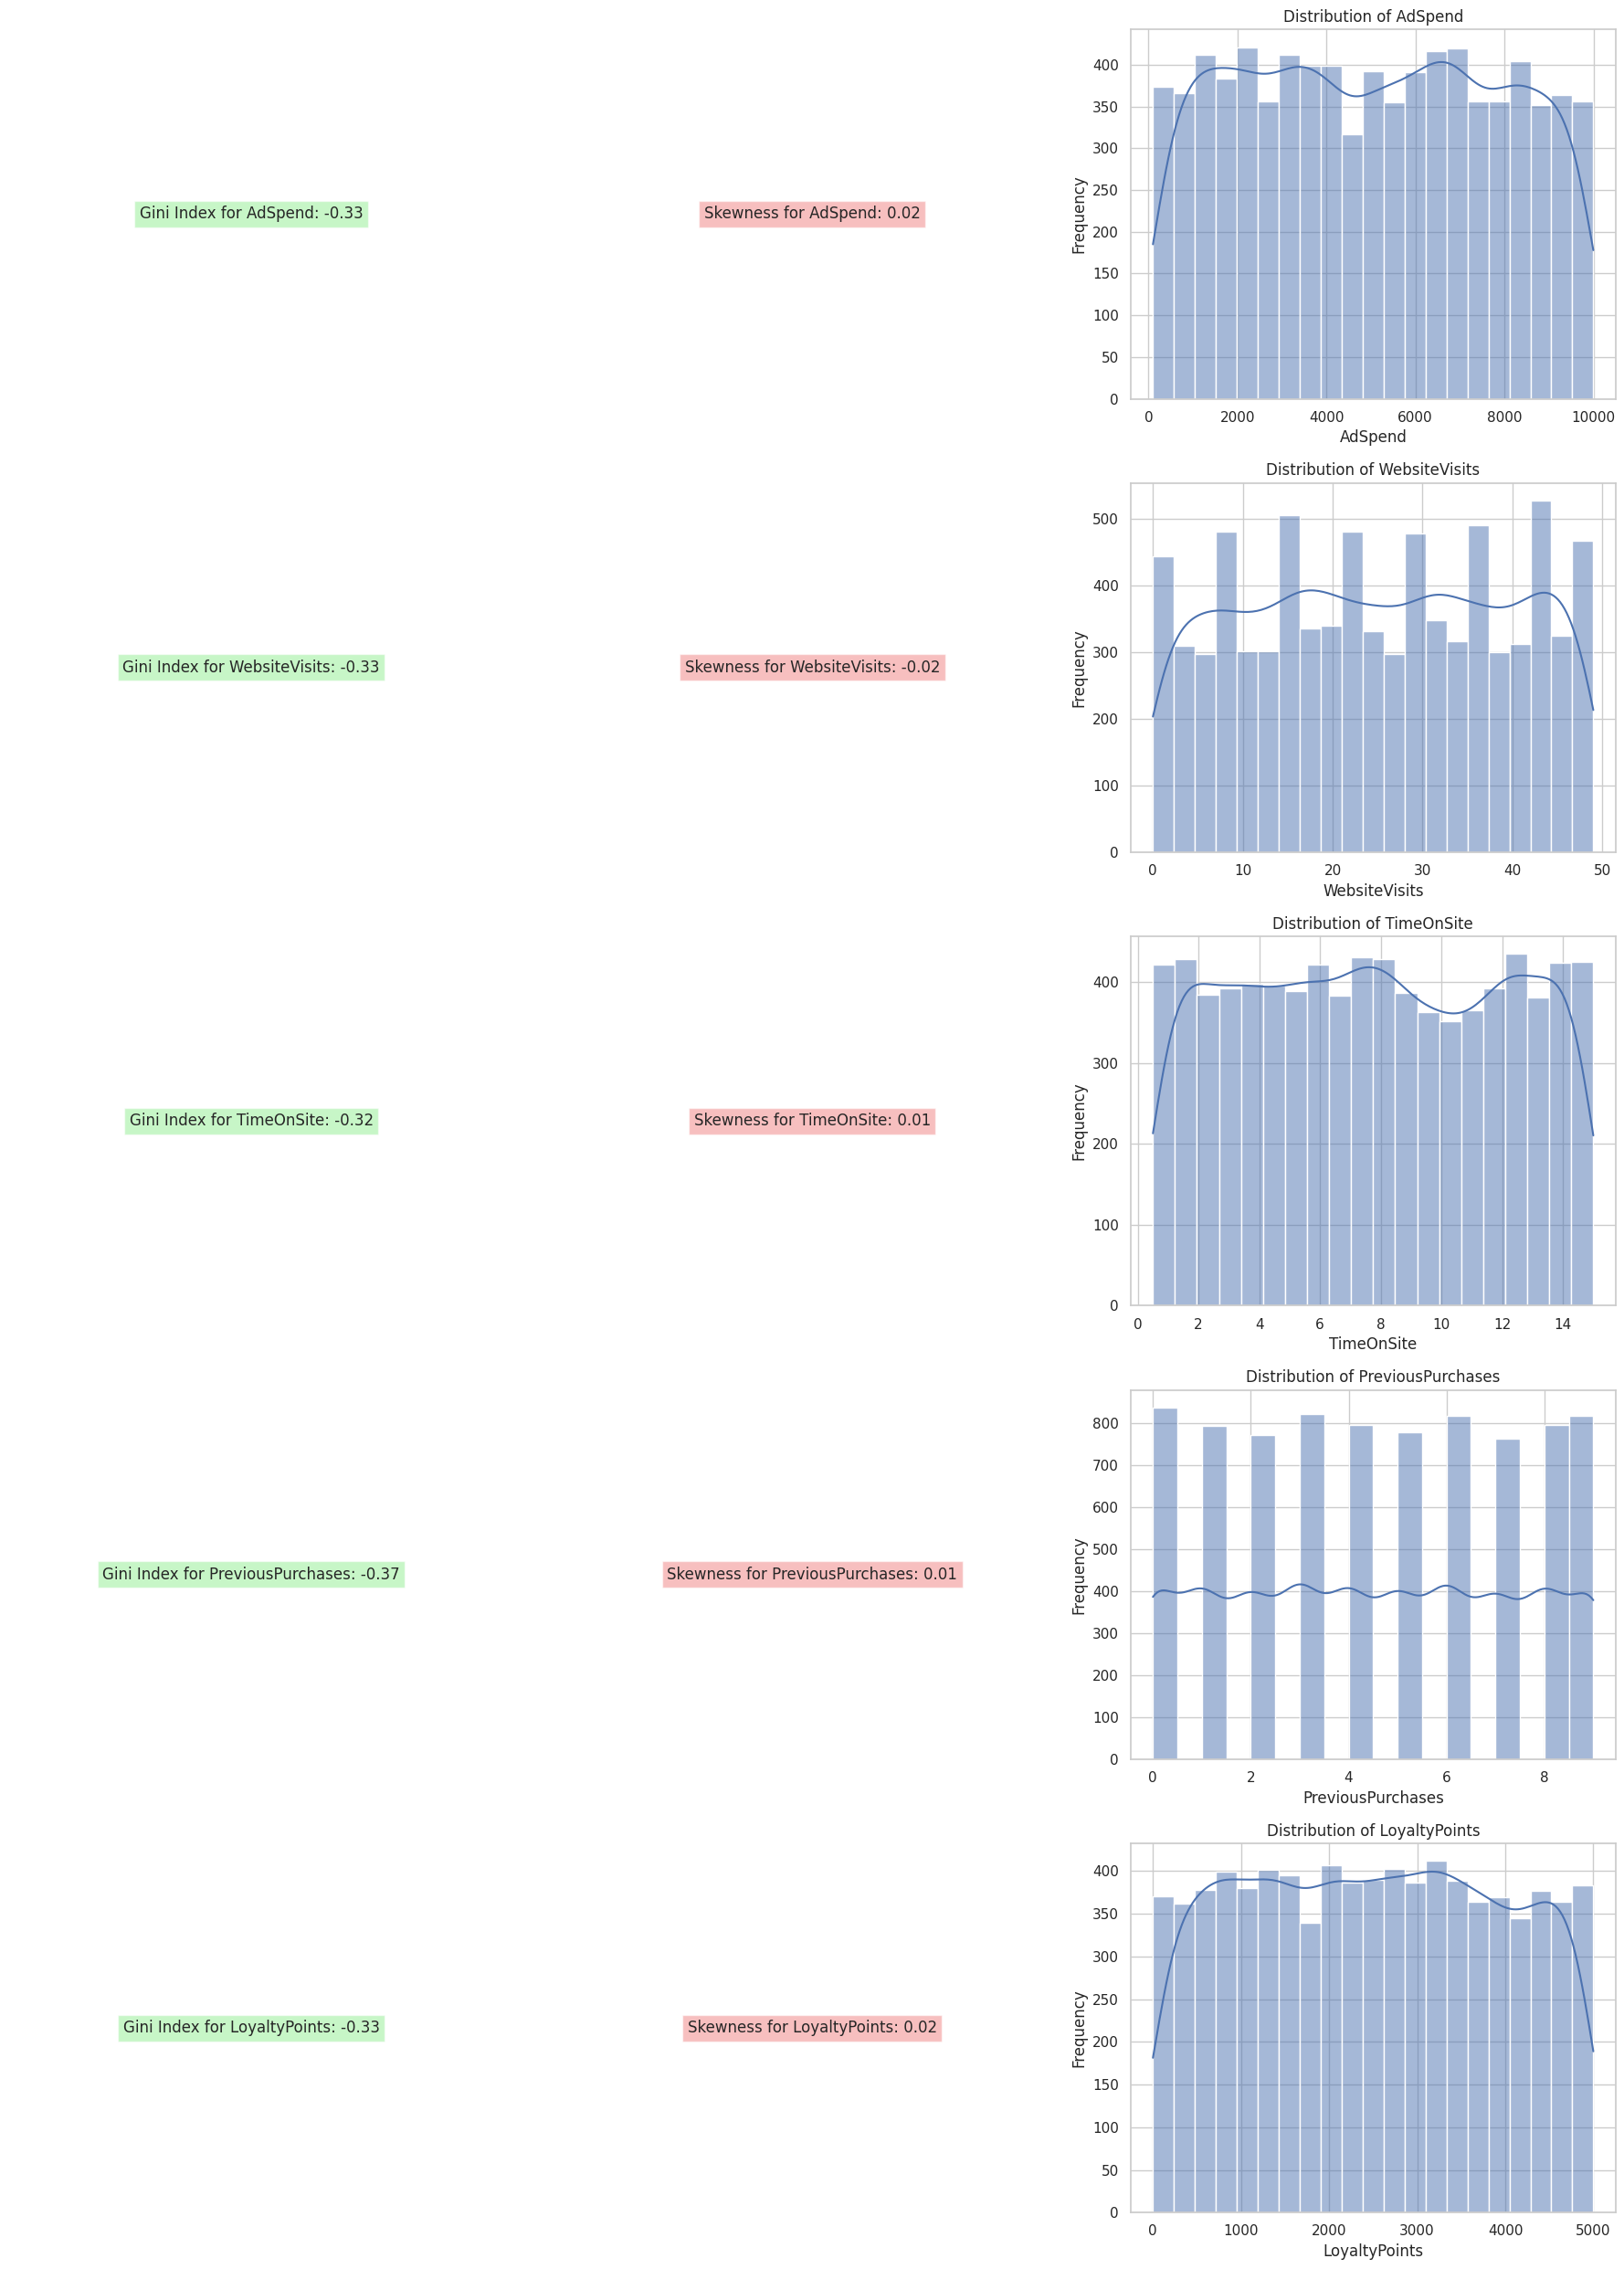

In [26]:
from scipy.stats import skew

# List of variables to calculate the indicators
variables = ['AdSpend', 'WebsiteVisits', 'TimeOnSite', 'PreviousPurchases', 'LoyaltyPoints']

# Function to calculate the Gini Index
def gini(array):
    sorted_array = np.sort(array)
    n = len(array)
    cumulative_values = np.cumsum(sorted_array)
    gini_index = (2 * np.sum(cumulative_values) / (n * cumulative_values[-1])) - (n + 1) / n
    return gini_index

# Creating subplots
fig, axes = plt.subplots(len(variables), 3, figsize=(18, 5 * len(variables)))

# Loop to calculate indicators and create plots
for i, var in enumerate(variables):
    # Gini Index
    gini_index = gini(data[var])

    # Coefficient of Skewness
    skewness = skew(data[var])

    # Display Gini Index
    axes[i, 0].text(0.5, 0.5, f'Gini Index for {var}: {gini_index:.2f}', 
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.5))
    axes[i, 0].axis('off')

    # Display Coefficient of Skewness
    axes[i, 1].text(0.5, 0.5, f'Skewness for {var}: {skewness:.2f}', 
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=12, bbox=dict(facecolor='lightcoral', alpha=0.5))
    axes[i, 1].axis('off')

    # Histogram of the variable
    sns.histplot(data[var], kde=True, ax=axes[i, 2])
    axes[i, 2].set_title(f'Distribution of {var}')
    axes[i, 2].set_xlabel(var)
    axes[i, 2].set_ylabel('Frequency')

# Adjusting layout
plt.tight_layout()
plt.show()

# Part 4) Data cleaning

In [27]:
# Checking for blank data
blank_data = data.isnull().sum()
print("Blank data by column:")
print(blank_data)

Blank data by column:
CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
AgeGroup               0
AdSpend_bins           0
dtype: int64


In [28]:
# Checking for NaN data
nan_data_by_column = data.isna().sum()
nan_total_data = data.isna().sum().sum()

print("NaN data by column:")
print(nan_data_by_column)
print("\nTotal NaN data in DataFrame:", nan_total_data)

NaN data by column:
CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
AgeGroup               0
AdSpend_bins           0
dtype: int64

Total NaN data in DataFrame: 0


In [29]:
# Checking for missing data
missing_data = data.isnull()

print("Missing data by column:")
missing_data

Missing data by column:


CustomerID    Age  Gender  Income  CampaignChannel  CampaignType  \
0          False  False   False   False            False         False   
1          False  False   False   False            False         False   
2          False  False   False   False            False         False   
3          False  False   False   False            False         False   
4          False  False   False   False            False         False   
...          ...    ...     ...     ...              ...           ...   
7995       False  False   False   False            False         False   
7996       False  False   False   False            False         False   
7997       False  False   False   False            False         False   
7998       False  False   False   False            False         False   
7999       False  False   False   False            False         False   

      AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  ...  \
0       False             False           False          False  ...   
1       False             False           False          False  ...   
2       False             False           False          False  ...   
3       False             False           False          False  ...   
4       False             False           False          False  ...   
...       ...               ...             ...            ...  ...   
7995    False             False           False          False  ...   
7996    False             False           False          False  ...   
7997    False             False           False          False  ...   
7998    False             False           False          False  ...   
7999    False             False           False          False  ...   

      SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            False       False        False              False          False   
1            False       False        False              False          False   
2            False       False        False              False          False   
3            False       False        False              False          False   
4            False       False        False              False          False   
...            ...         ...          ...                ...            ...   
7995         False       False        False              False          False   
7996         False       False        False              False          False   
7997         False       False        False              False          False   
7998         False       False        False              False          False   
7999         False       False        False              False          False   

      AdvertisingPlatform  AdvertisingTool  Conversion  AgeGroup  AdSpend_bins  
0                   False            False       False     False         False  
1                   False            False       False     False         False  
2                   False            False       False     False         False  
3                   False            False       False     False         False  
4                   False            False       False     False         False  
...                   ...              ...         ...       ...           ...  
7995                False            False       False     False         False  
7996                False            False       False     False         False  
7997                False            False       False     False         False  
7998                False            False       False     False         False  
7999                False            False       False     False         False  

[8000 rows x 22 columns]

In [30]:
# Deleting columns
data.drop(['CustomerID'],axis=1,inplace=True)
data.drop(['AdSpend_bins'],axis=1,inplace=True) 
data.drop(['AgeGroup'],axis=1,inplace=True)
data.head()

Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0   56  Female  136912    Social Media    Awareness  6497.870068   
1   69    Male   41760           Email    Retention  3898.668606   
2   46  Female   88456             PPC    Awareness  1546.429596   
3   32  Female   44085             PPC   Conversion   539.525936   
4   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

  AdvertisingPlatform AdvertisingTool  Conversion  
0            IsConfid      ToolConfid           1  
1            IsConfid      ToolConfid           1  
2            IsConfid      ToolConfid           1  
3            IsConfid      ToolConfid           1  
4            IsConfid      ToolConfid           1

In [31]:
# Print the total number of missing values in the entire DataFrame.
total_missing = data.isnull().sum().sum() 
print("Total data missing in DataFrame:", total_missing)

Total data missing in DataFrame: 0


# Part 5) Feature engineering

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'data' is the original DataFrame
# Selecting the columns that will be transformed using OneHotEncoding
columns_to_encode = ['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool']

# Creating the OneHotEncoder with drop='first' to avoid multicollinearity
onehotencoder = OneHotEncoder(drop='first', sparse_output=False)

# Using ColumnTransformer to apply OneHotEncoder only to the categorical columns
column_transformer = ColumnTransformer(transformers=[('cat', 
                                                      onehotencoder, 
                                                      columns_to_encode)],
                                       remainder='passthrough'  # Keeps the other columns unchanged
                                      )

# Fitting and transforming the data
data_encoded = column_transformer.fit_transform(data)

# Viewing the ColumnTransformer object
column_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Gender', 'CampaignChannel', 'CampaignType',
                                  'AdvertisingPlatform', 'AdvertisingTool'])])

In [33]:
# Obtaining the names of the new columns after OneHotEncoding
encoded_columns = column_transformer.named_transformers_['cat'].get_feature_names_out(columns_to_encode)

# Creating a DataFrame with all columns (OneHotEncoded + the columns that were not transformed)
all_columns = list(encoded_columns) + [col for col in data.columns if col not in columns_to_encode]
data_encoded_df = pd.DataFrame(data_encoded, columns=all_columns)

# Viewing the first few rows of the resulting DataFrame
data_encoded_df

Gender_Male  CampaignChannel_PPC  CampaignChannel_Referral  \
0             0.0                  0.0                       0.0   
1             1.0                  0.0                       0.0   
2             0.0                  1.0                       0.0   
3             0.0                  1.0                       0.0   
4             0.0                  1.0                       0.0   
...           ...                  ...                       ...   
7995          1.0                  0.0                       0.0   
7996          0.0                  0.0                       0.0   
7997          0.0                  0.0                       1.0   
7998          0.0                  1.0                       0.0   
7999          0.0                  0.0                       0.0   

      CampaignChannel_SEO  CampaignChannel_Social Media  \
0                     0.0                           1.0   
1                     0.0                           0.0   
2                     0.0                           0.0   
3                     0.0                           0.0   
4                     0.0                           0.0   
...                   ...                           ...   
7995                  0.0                           0.0   
7996                  1.0                           0.0   
7997                  0.0                           0.0   
7998                  0.0                           0.0   
7999                  0.0                           0.0   

      CampaignType_Consideration  CampaignType_Conversion  \
0                            0.0                      0.0   
1                            0.0                      0.0   
2                            0.0                      0.0   
3                            0.0                      1.0   
4                            0.0                      1.0   
...                          ...                      ...   
7995                         0.0                      0.0   
7996                         0.0                      0.0   
7997                         1.0                      0.0   
7998                         1.0                      0.0   
7999                         0.0                      0.0   

      CampaignType_Retention   Age    Income  ...  ConversionRate  \
0                        0.0  56.0  136912.0  ...        0.088031   
1                        1.0  69.0   41760.0  ...        0.182725   
2                        0.0  46.0   88456.0  ...        0.076423   
3                        0.0  32.0   44085.0  ...        0.088004   
4                        0.0  60.0   83964.0  ...        0.109940   
...                      ...   ...       ...  ...             ...   
7995                     0.0  21.0   24849.0  ...        0.116773   
7996                     1.0  43.0   44718.0  ...        0.190061   
7997                     0.0  28.0  125471.0  ...        0.133826   
7998                     0.0  19.0  107862.0  ...        0.138386   
7999                     0.0  31.0   93002.0  ...        0.057228   

      WebsiteVisits  PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  \
0               0.0       2.399017    7.396803          19.0         6.0   
1              42.0       2.917138    5.352549           5.0         2.0   
2               2.0       8.223619   13.794901           0.0        11.0   
3              47.0       4.540939   14.688363          89.0         2.0   
4               0.0       2.046847   13.993370           6.0         6.0   
...             ...            ...         ...           ...         ...   
7995           23.0       9.693602   14.227794          70.0        13.0   
7996           49.0       9.499010    3.501106          52.0        13.0   
7997           35.0       2.853241   14.618323          38.0        16.0   
7998           49.0       1.002964    3.876623          86.0         1.0   
7999           15.0       6.964739   12.763660           2.0        18.0   

     

In [34]:
# Check the total size of the DataFrame 
# Show the total number of rows and columns
print(data_encoded_df.shape) 

(8000, 22)


# Part 6) Training and test division

In [35]:
# Split the data into features (X) and target (y)
X = data_encoded_df.drop("Conversion", axis=1) # Drop the target column to get the features
y = data_encoded_df["Conversion"] # Set the target column

In [36]:
# Visualize rows and column x
X.shape

(8000, 21)

In [37]:
# Visualize rows and column y
y.shape

(8000,)

# Part 7) Model training and testing

In [38]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize training data
print("Rows and columns of training data X_train:", X_train.shape)
print("Rows and columns of training data y_train:", X_train.shape)

Rows and columns of training data X_train: (6400, 21)
Rows and columns of training data y_train: (6400, 21)


**Model Training and Data Splitting**

A crucial step after data preparation is model training. This involves splitting the data into training and test sets. This division allows for evaluating the model's performance on unseen data during training, helping to avoid overfitting and assess the model's generalization capability.

In practice, it is common to adopt a standard split, such as the popular 80% for training and 20% for testing. This division ensures that the model is trained on a substantial amount of data while still having a significant portion for evaluation.

For example, when predicting churn in a telecommunications company, we would split the data into features (such as usage history, plan type, etc.) and the target variable, "Churn." Then, we would apply the train-test split, where 80% of the data is used to train the model and the remaining 20% is used to evaluate its performance.

This practice of data splitting is fundamental to ensure that the model is robust and capable of generalizing to new, unseen data during training.

# A) Section - Machine learning 

- **1) Business problem** - Predictive modeling of customer conversion rates.

- **2) Business problem** - What are the most influential factors in customer conversion?

- **3) Business problem** - How can you optimize your marketing budget?

- **4) Business problem** - Which marketing channels are most effective for different customer profiles?

- **5) Business problem** - Which marketing strategies lead to greater customer retention and loyalty?

## Part 8) Machine learning models

## 8.1) Machine learning business problem 1 - Predictive modeling of customer conversion rates.

**Model Implementation and Data Splitting**

At the fifth stage of the project, I am focused on implementing machine learning models. I am developing eight distinct algorithms for analysis, which include Logistic Regression, Naive Bayes, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, XGBoost, and LightGBM. This diversity of algorithms allows us to explore different approaches and techniques for the problem at hand. During the training process, we closely monitor the performance of each model, aiming to identify the one that best fits the data and provides the most accurate predictions. This stage is crucial as it allows us to evaluate and compare the performance of each algorithm, thereby selecting the most effective machine learning model for our specific application.

Throughout this stage, I am developing and training eight distinct machine learning algorithms. These algorithms were carefully selected to encompass a wide range of techniques and characteristics, aiming to capture the complexity and nuances of the data:

- **Logistic Regression:** A linear model used for solving binary classification problems.

- **Naive Bayes:** A probabilistic model based on Bayes' theorem, suitable for classification problems with independent features.

- **Decision Tree:** A model that uses a tree structure to represent hierarchical decision rules.

- **Random Forest:** An ensemble learning technique that combines multiple decision trees to improve model accuracy and robustness.

- **AdaBoost:** Another ensemble learning algorithm that iteratively adjusts the weights of observations to focus on the most challenging cases.

- **Gradient Boosting:** An ensemble learning technique that builds decision trees sequentially, optimizing a specific loss criterion.

- **XGBoost:** An efficient implementation of gradient boosting, known for its speed and superior performance.

- **LightGBM:** Another implementation of gradient boosting, designed to train models quickly and with efficient memory usage.

**Training and Evaluation**

Each of these algorithms is being trained and tuned using best practices in machine learning. After training, we evaluate the performance of each model on a validation set, using metrics appropriate to our problem, such as accuracy, recall, F1-score, among others.

**Selection of the Best Model**

At the end of this process, we will compare the performance of all models and select the one that shows the best results according to our evaluation criteria. This choice will be based not only on the performance metric but also on the interpretability of the model, its generalization capability, and its suitability to the problem requirements.

This meticulous and comprehensive approach will allow us to identify the most effective machine learning model to solve our specific problem, providing valuable insights and driving informed decision-making.

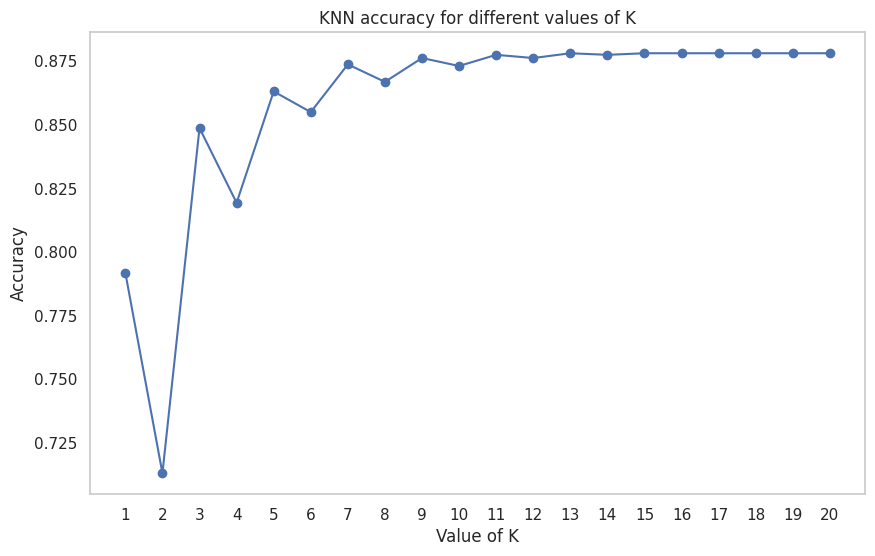

Best value of K: 13
Corresponding accuracy: 0.878125


In [39]:
# Importing KKN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Find the ideal value of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

In [40]:
%%time

# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Models to be evaluated
models = [ 
            # Naive Bayes Model
            GaussianNB(),
    
            # Decision Tree Model
            DecisionTreeClassifier(random_state=42),
    
            # Random forest model
            RandomForestClassifier(n_estimators=100, random_state=42),
    
            # Logistic regression model
            LogisticRegression(random_state=50),
    
            # Ada Boost Model
            AdaBoostClassifier(random_state=45),
    
            # XGBoost Model
            # Parameter tree_method='gpu_hist' for XGBoost GPU
            XGBClassifier(tree_method='gpu_hist', random_state=42),
    
            # LightGBM Model
            # Parameter device='gpu' for LightGBM GPU
            LGBMClassifier(num_leaves=31,
                           boosting_type='gbdt',
                           bagging_fraction=0.9,
                           learning_rate=0.05,
                           feature_fraction=0.9,
                           bagging_freq=50,
                           verbose=50,
                           device='gpu'),
    
            # K-Nearest Neighbors Model
            KNeighborsClassifier(n_neighbors=13), 
    
            # Gradient Boosting Classifier
            GradientBoostingClassifier(random_state=42)]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")

Model 1: GaussianNB
Training Accuracy: 0.8809375
Testing Accuracy: 0.880625
-----------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.828125
-----------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.89375
-----------------
Model 4: LogisticRegression
Training Accuracy: 0.87625
Testing Accuracy: 0.879375
-----------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.91203125
Testing Accuracy: 0.9075
-----------------
Model 6: XGBClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.91625
-----------------
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Warning] Found whitespace in feature_names, replace w

1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 15 dense feature groups (0.10 MB) transferred to GPU in 0.000748 secs. 1 sparse feature groups
[LightGBM] [Debug] Use subset for bagging
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.875938 -> initscore=1.954509
[LightGBM] [Info] Start training from score 1.954509
[LightGBM] [Debug] Re-bagging, using 5764 data to train
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 15 dense feature groups (0.09 MB) transferred to GPU in 0.000794 secs. 1 sparse feature groups
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM

**Part 8.2 - Feature importances**

Feature importances refers to the measure of how important each feature is for a machine learning model in making predictions or classifications. In other words, it is a way to quantify the impact or contribution of each feature to the decisions made by the model.

In many machine learning algorithms such as decision trees, Random Forest, Gradient Boosting, among others, it is possible to calculate the importance of features during model training. This is done by observing how each feature influences the decisions made by the model when dividing the data into decision tree nodes or by weighing the features in other model structures.

Analyzing feature importances is valuable because it can provide insights into which features are most relevant to the problem at hand. This information can be used to optimize the model, remove irrelevant or redundant features, identify important factors for prediction, and even assist in interpreting the model's results.

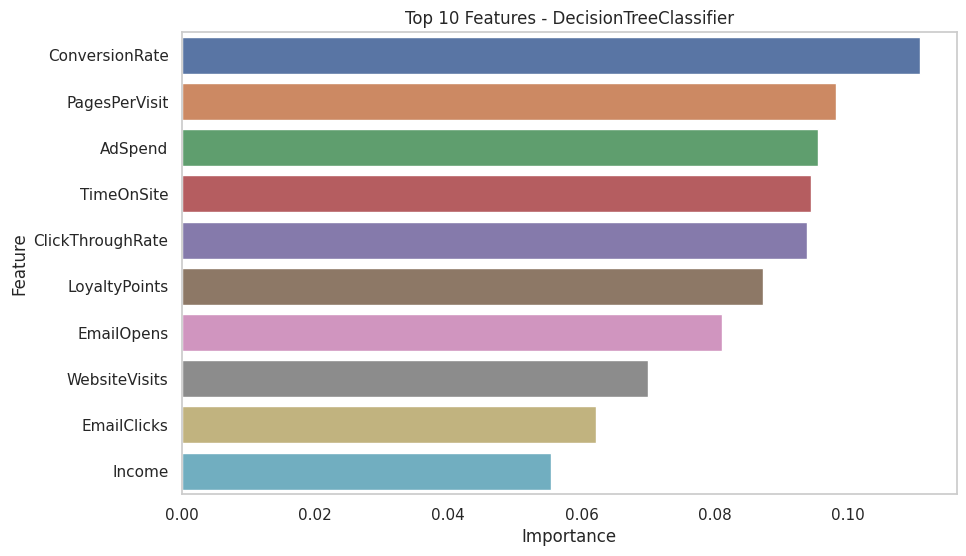

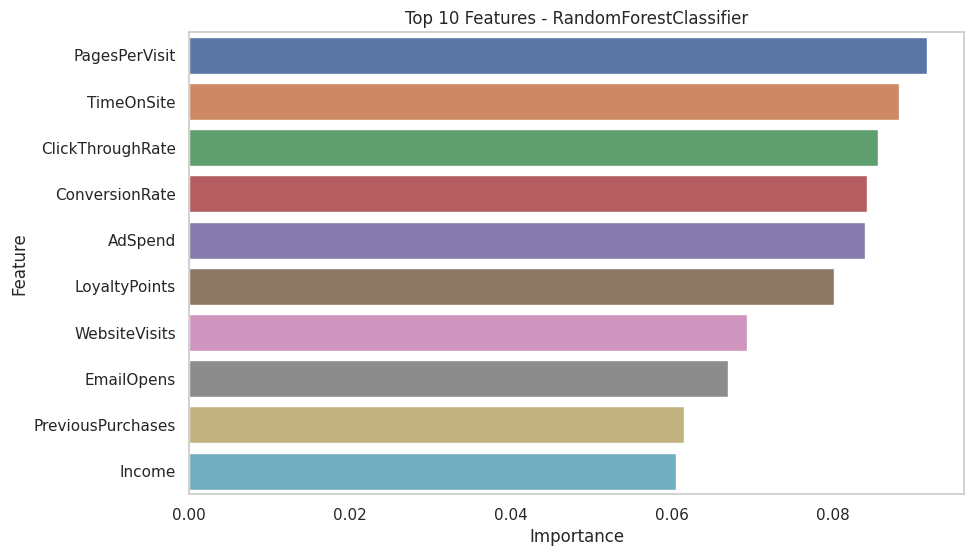

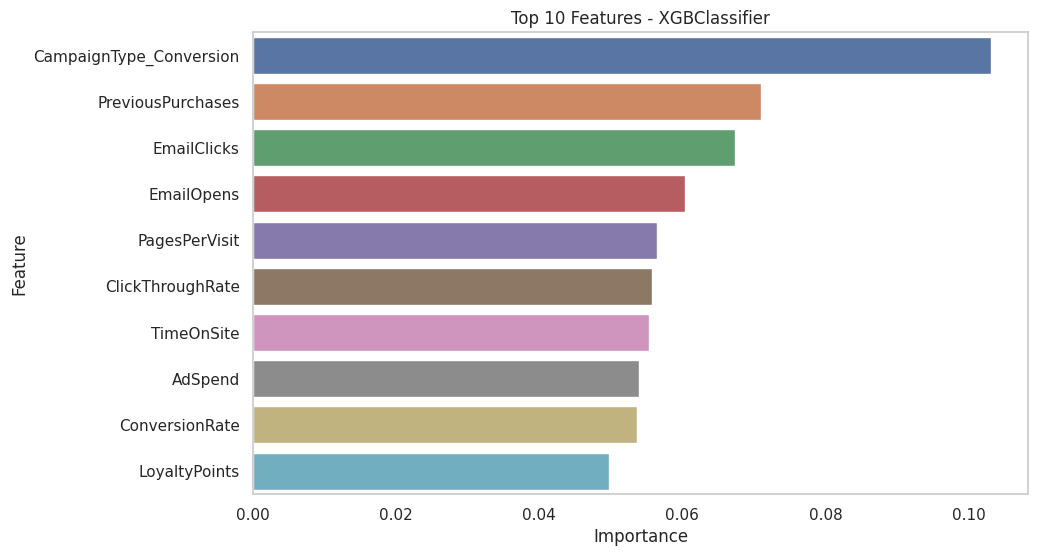

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5606, number of negative: 794
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.875938 -> initscore=1.954509
[LightGBM] [Info] Start training from score 1.954509


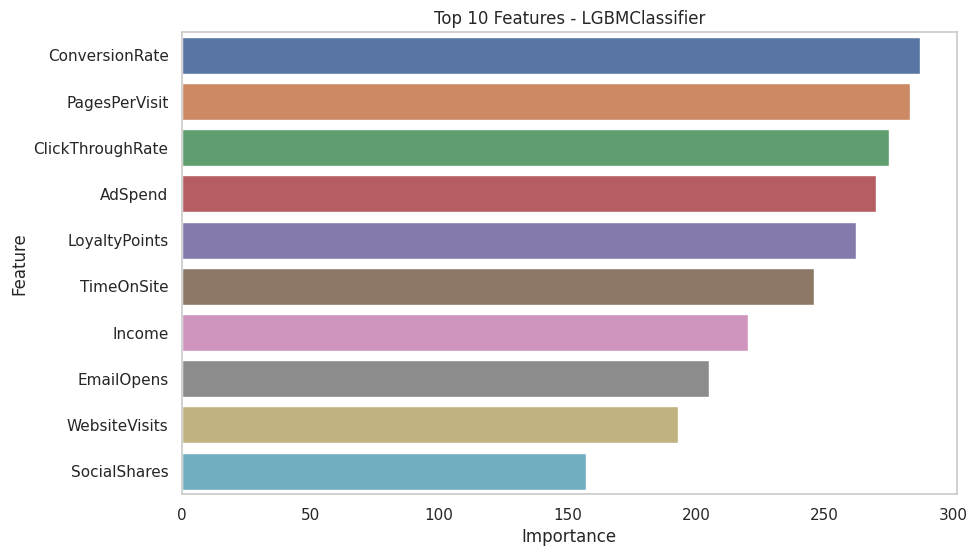

In [41]:
# Train models that support feature importances
models_with_feature_importances = [("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
                                   ("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),
                                   ("XGBClassifier", XGBClassifier(random_state=42)),
                                   ("LGBMClassifier", LGBMClassifier(random_state=42))]

# Iterate over models
for model_name, model in models_with_feature_importances:
    
    # Train model
    model.fit(X_train, y_train)
    
    # Get importance of features
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    else:
        # If the model does not have feature_importances_, continue to the next model
        print(f"{model_name} does not support feature importances.")
        continue

    # Create DataFrame for easier viewing
    feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 
                                           'Importance': feature_importances})
    
    # Sort by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:10])
    plt.title(f"Top 10 Features - {model_name}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(False)
    plt.show()

### Feature Importance Analysis Across Models

The provided plots display the top 10 features based on their importance scores across various models: **DecisionTreeClassifier**, **RandomForestClassifier**, **XGBClassifier**, and **LGBMClassifier**. Here's a detailed analysis:

1. **DecisionTreeClassifier:**
   - **Top Feature: ConversionRate**
     - The most important feature for the DecisionTreeClassifier is `ConversionRate`, indicating that this model heavily relies on the conversion rate to make predictions.
   - **Significant Features:**
     - Other significant features include `PagesPerVisit`, `AdSpend`, and `TimeOnSite`, which are metrics related to user engagement and marketing efforts.
   - **Lower Importance:**
     - Features like `EmailClicks` and `Income` have lower importance but still contribute to the model’s decision-making process.

2. **RandomForestClassifier:**
   - **Top Feature: PagesPerVisit**
     - Unlike the DecisionTreeClassifier, the RandomForestClassifier prioritizes `PagesPerVisit` as the most important feature, highlighting that user engagement (in terms of pages visited) is crucial for this model.
   - **Other Key Features:**
     - Features such as `TimeOnSite`, `ClickThroughRate`, and `ConversionRate` are also crucial, suggesting that user interaction and conversion likelihood are critical predictors.
   - **Balanced Importance:**
     - The importance is more evenly distributed across features like `PreviousPurchases` and `Income`, suggesting a more balanced approach in feature consideration.

3. **XGBClassifier:**
   - **Top Feature: CampaignType_Conversion**
     - The `CampaignType_Conversion` is the most significant feature for XGBClassifier, indicating that the type of campaign has a major impact on conversion predictions for this model.
   - **Key Features:**
     - `PreviousPurchases`, `EmailClicks`, and `EmailOpens` are highly ranked, suggesting that past purchasing behavior and engagement with marketing emails are strong predictors for conversion.
   - **Broader Feature Set:**
     - XGBClassifier highlights a broader range of features, including `AdSpend`, `ConversionRate`, and `LoyaltyPoints`, emphasizing a mix of marketing efforts and customer loyalty.

4. **LGBMClassifier:**
   - **Top Feature: ConversionRate**
     - Similar to DecisionTreeClassifier, the `ConversionRate` is the most influential feature in LGBMClassifier, indicating a strong reliance on this metric for prediction.
   - **Other Important Features:**
     - Features such as `PagesPerVisit`, `ClickThroughRate`, and `AdSpend` are also prominent, reinforcing the importance of user engagement metrics in this model.
   - **Diverse Influences:**
     - The model also considers `Income`, `EmailOpens`, and `SocialShares`, showing a diverse set of influences on the prediction outcome.

### General Observations:
- **Common Significant Features:**
  - Across most models, features like `ConversionRate`, `PagesPerVisit`, and `TimeOnSite` consistently appear as important, indicating that these metrics are crucial across different types of classifiers for predicting conversion.
  
- **Variability in Feature Importance:**
  - While there is some consistency, the importance of features varies depending on the model. For example, `CampaignType_Conversion` is highly important in XGBClassifier but not in the others, showing that different models may prioritize different aspects of the data.
  
- **Model-Specific Insights:**
  - Each model brings unique insights into the data, which can be leveraged for different aspects of marketing strategy optimization. For example, DecisionTreeClassifier and LGBMClassifier emphasize `ConversionRate`, while RandomForestClassifier places more importance on engagement metrics like `PagesPerVisit`.

### Conclusion:
These feature importance plots provide valuable insights into which factors are driving the predictions in each model. The consistency of certain features across models reinforces their importance, while the variability between models suggests that a combination of different models might provide a more comprehensive understanding of the factors influencing customer conversion.

The model GaussianNB is not compatible with SHAP: The passed model is not callable and cannot be analyzed directly with the given masker! Model: GaussianNB()
Model: DecisionTreeClassifier
The model DecisionTreeClassifier is not compatible with SHAP: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (21, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.


 98%|===================| 1966/2000 [00:58<00:01]       

Model: RandomForestClassifier
The model RandomForestClassifier is not compatible with SHAP: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (21, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.
Model: LogisticRegression


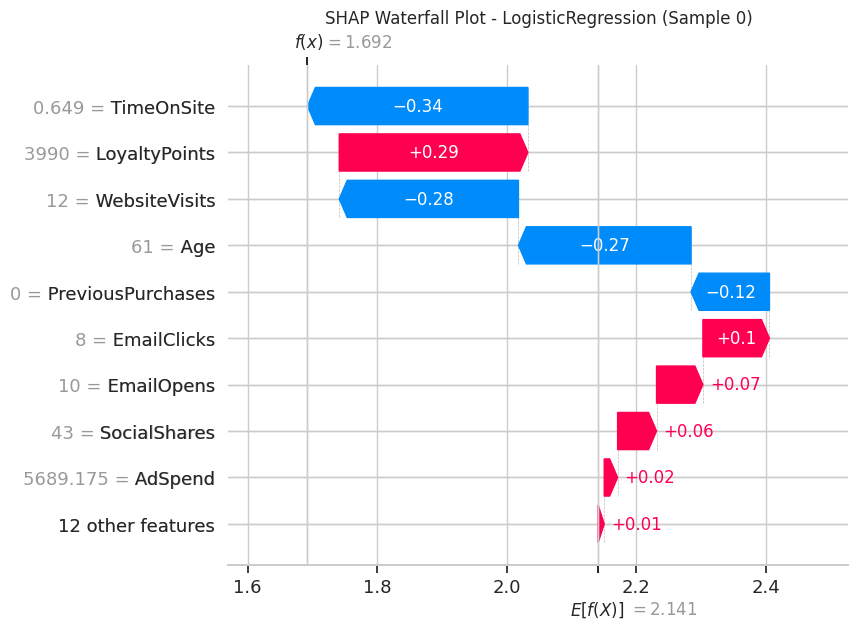

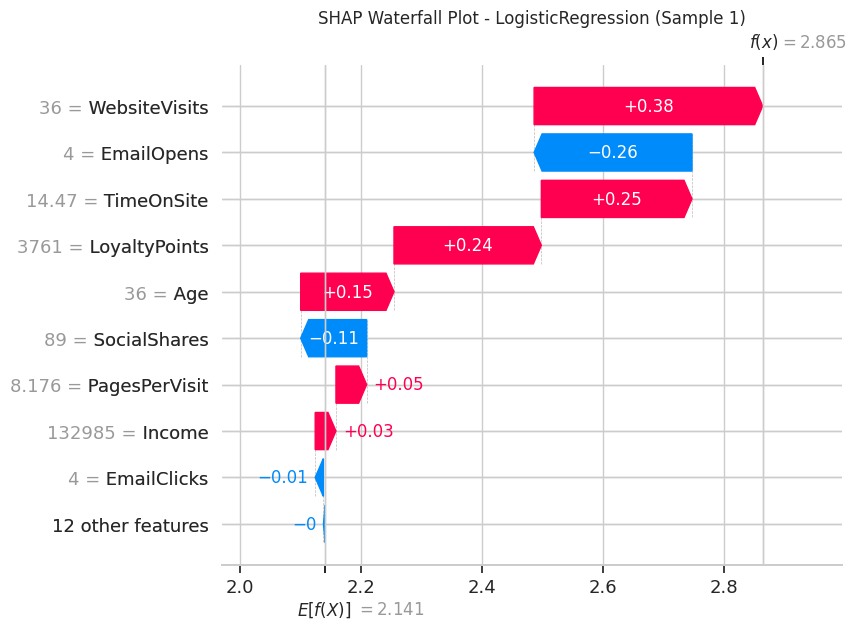

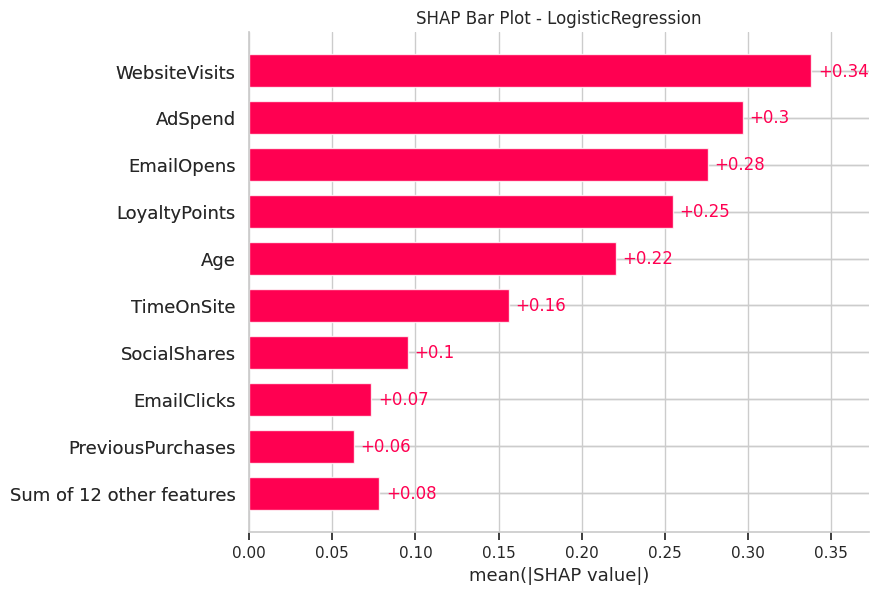

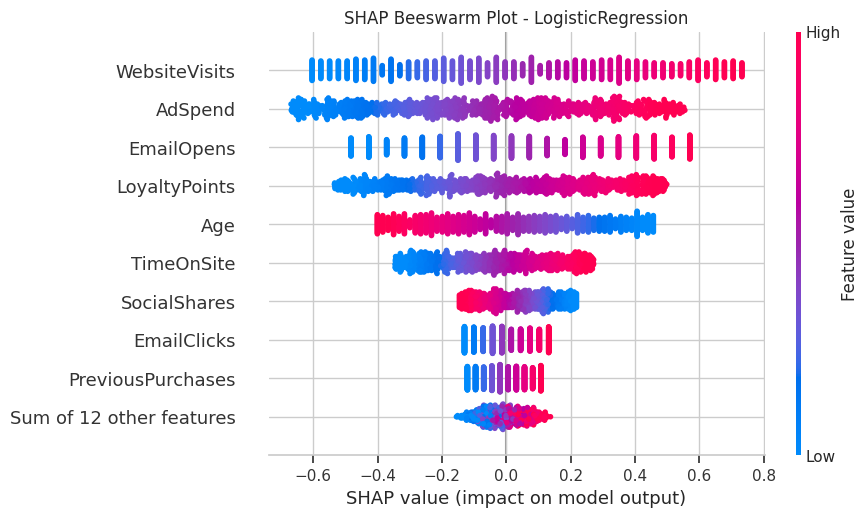

The model AdaBoostClassifier is not compatible with SHAP: The passed model is not callable and cannot be analyzed directly with the given masker! Model: AdaBoostClassifier(random_state=45)
Model: XGBClassifier


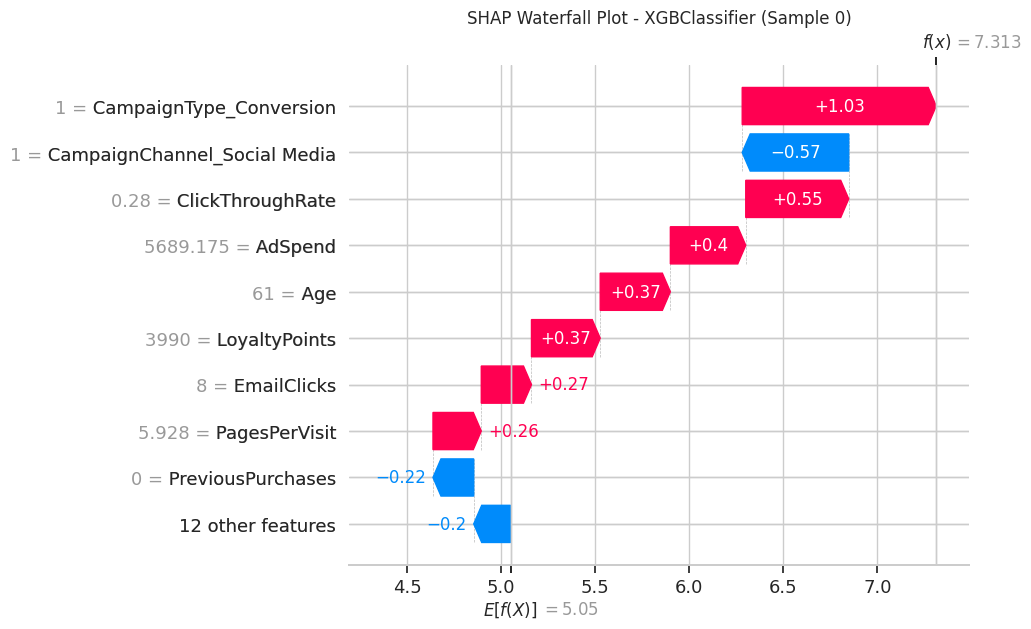

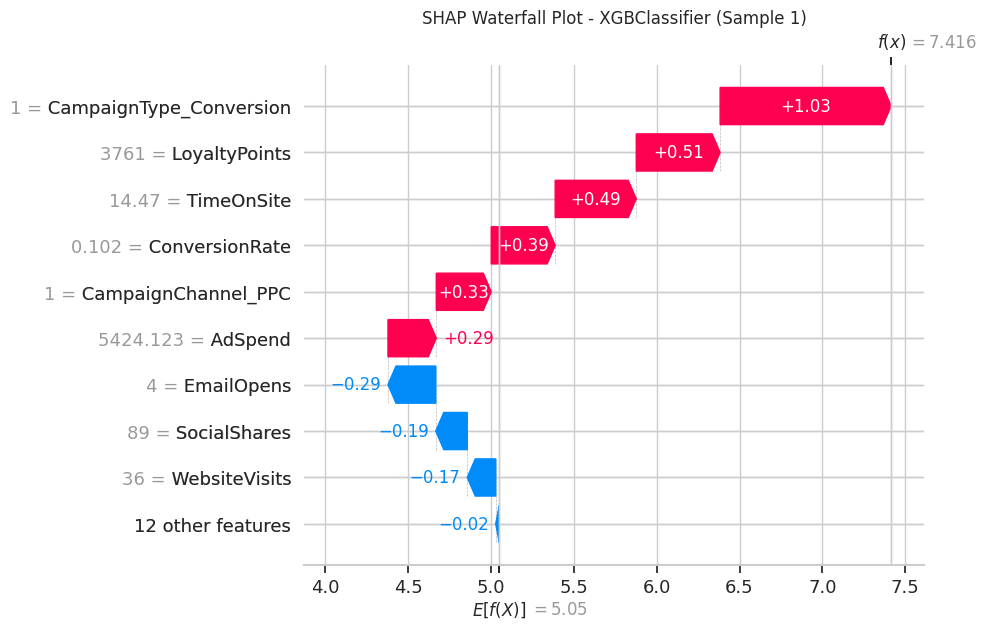

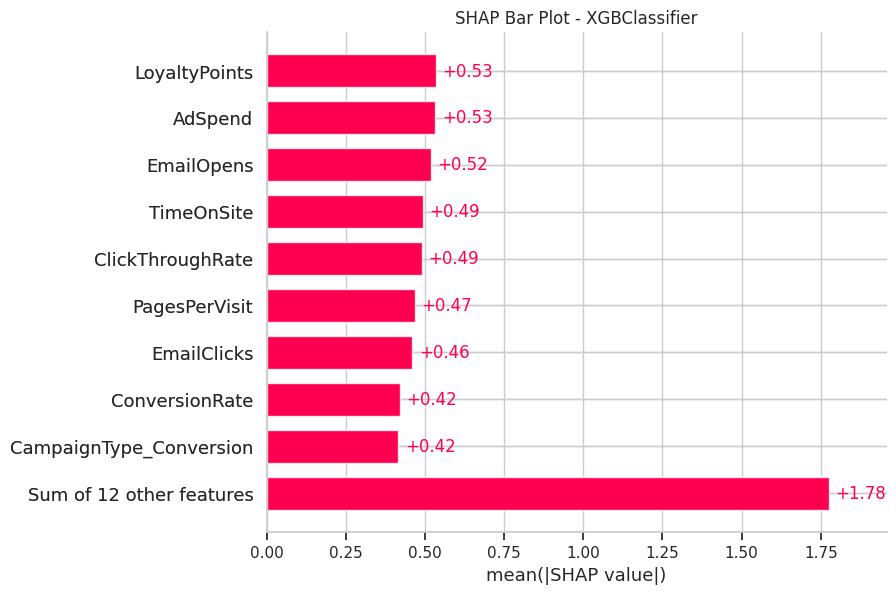

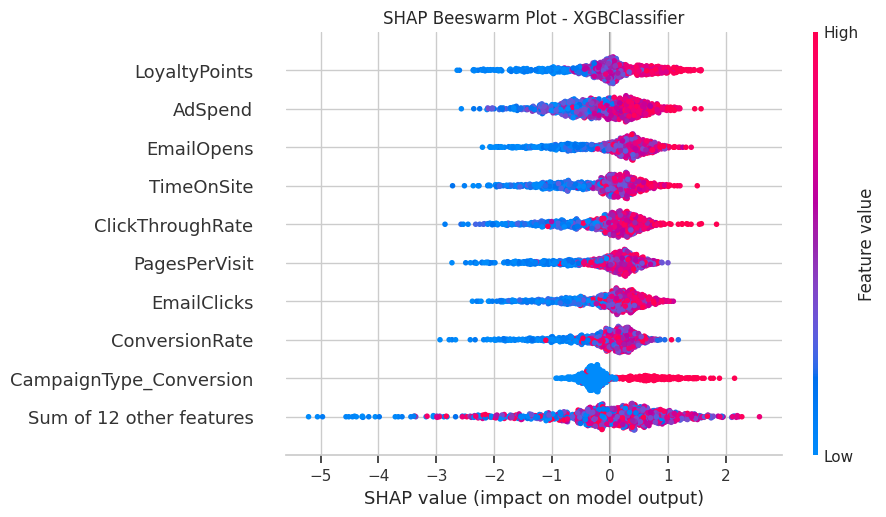

Model: LGBMClassifier


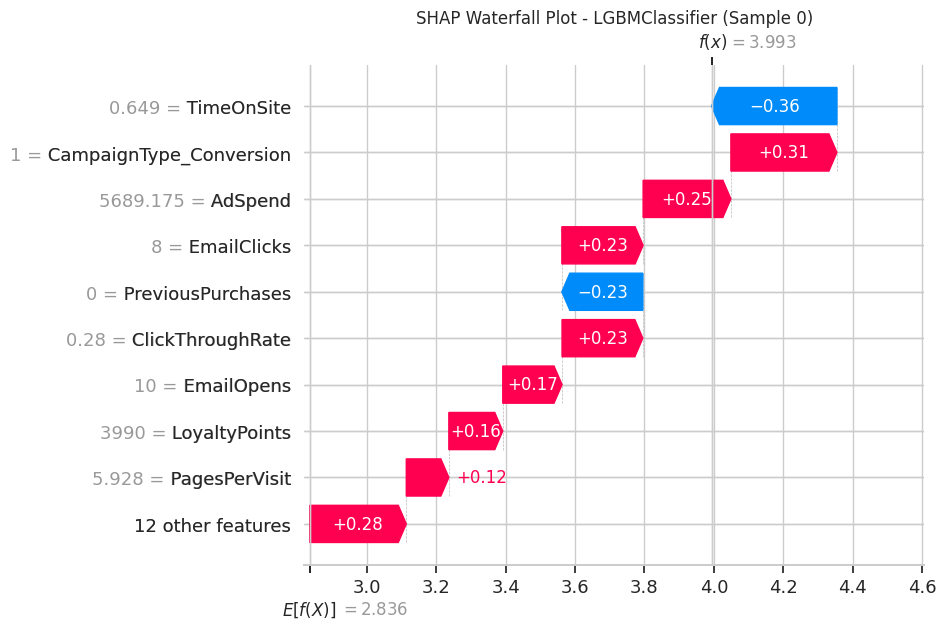

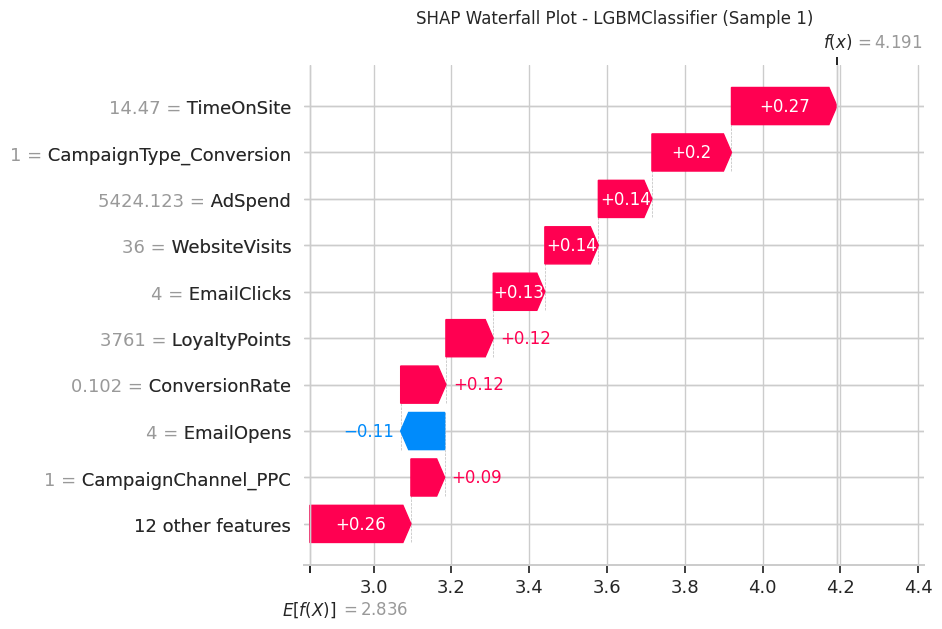

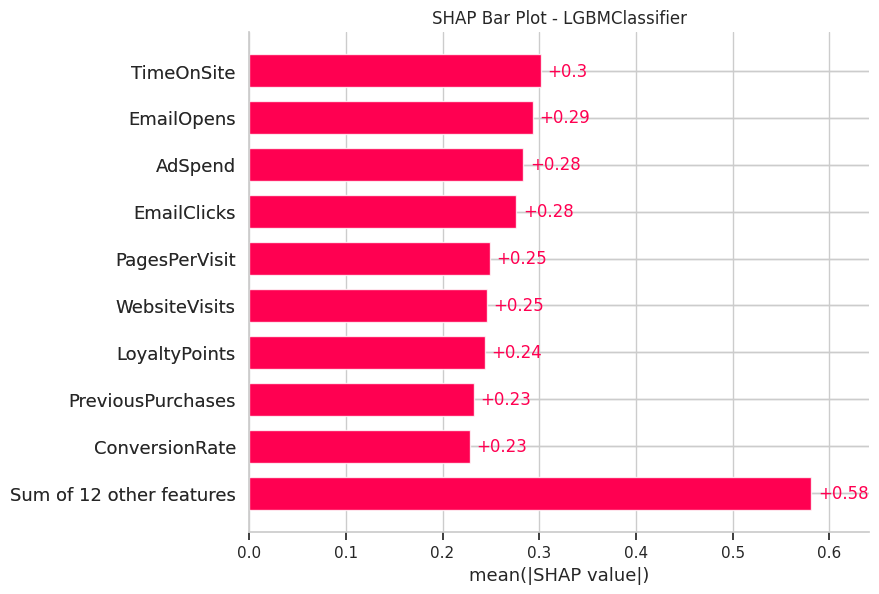

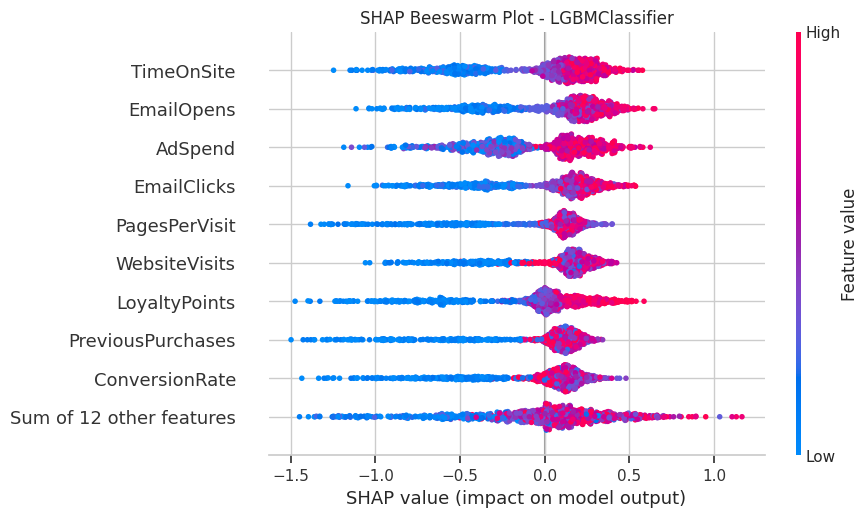

The model KNeighborsClassifier is not compatible with SHAP: The passed model is not callable and cannot be analyzed directly with the given masker! Model: KNeighborsClassifier(n_neighbors=13)
Model: GradientBoostingClassifier


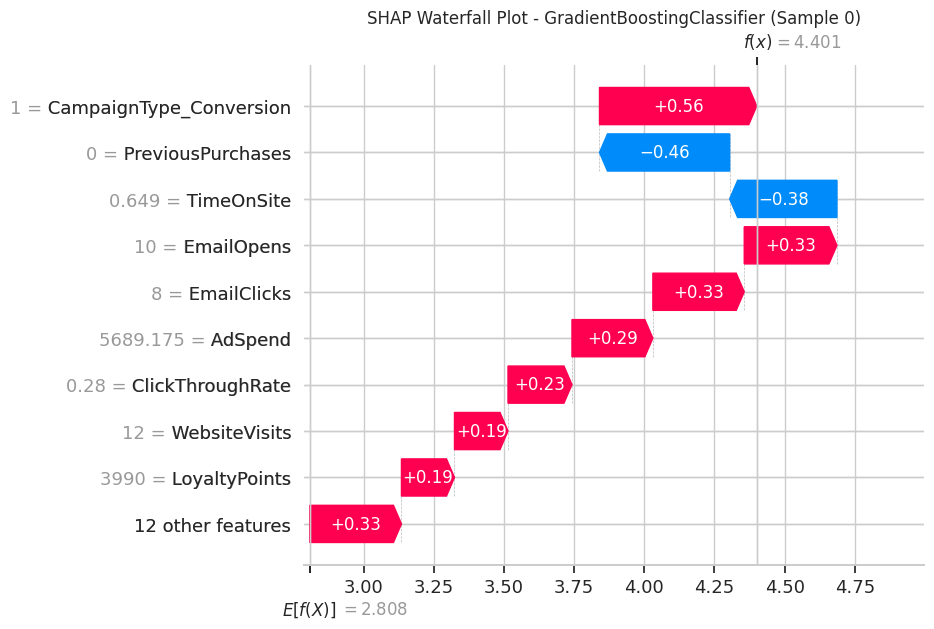

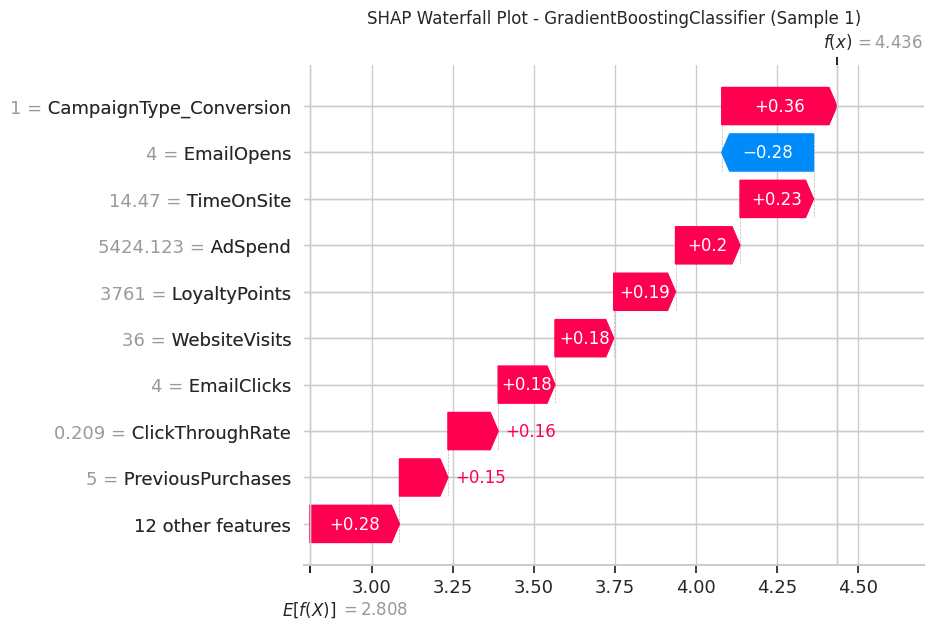

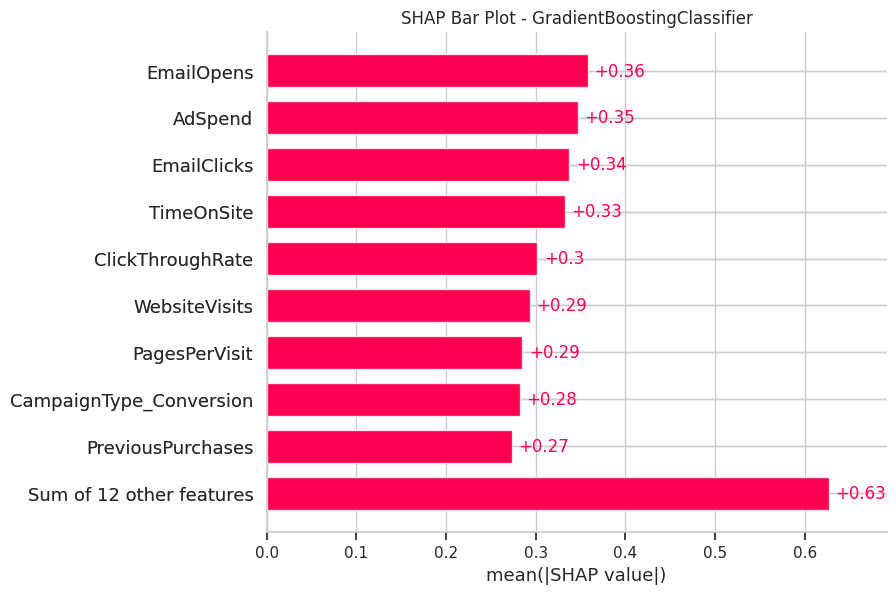

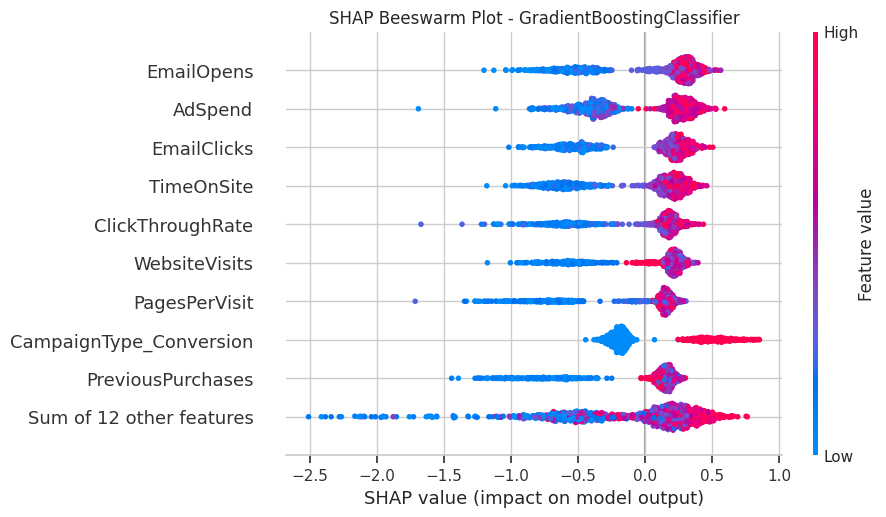

In [42]:
import shap

# Create a list of model names corresponding to the order of the models
model_names = ["GaussianNB",
               "DecisionTreeClassifier",
               "RandomForestClassifier",
               "LogisticRegression",
               "AdaBoostClassifier", 
               "XGBClassifier", 
               "LGBMClassifier", 
               "KNeighborsClassifier",
               "GradientBoostingClassifier"]

# Creating an explainer object and calculating SHAP values for each model
for i, model in enumerate(models):
    model_name = model_names[i]
    
    try:
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_train[:1000])
        
        # Generate SHAP plots
        print(f"Model: {model_name}")
        
        # Waterfall plot for the first sample
        shap.plots.waterfall(shap_values[0], show=False)
        plt.title(f"SHAP Waterfall Plot - {model_name} (Sample 0)")
        plt.show()
        
        # Waterfall plot for the second sample
        shap.plots.waterfall(shap_values[1], show=False)
        plt.title(f"SHAP Waterfall Plot - {model_name} (Sample 1)")
        plt.show()
        
        # Bar plot for average SHAP values
        shap.plots.bar(shap_values, show=False)
        plt.title(f"SHAP Bar Plot - {model_name}")
        plt.show()
        
        # Beeswarm plot to visualize the distribution of SHAP values
        shap.plots.beeswarm(shap_values, show=False)
        plt.title(f"SHAP Beeswarm Plot - {model_name}")
        plt.show()
        
    except Exception as e:
        print(f"The model {model_name} is not compatible with SHAP: {e}")

# Part 9) Model Metrics

Model 1: GaussianNB
Training Accuracy: 0.8809375
Testing Accuracy: 0.880625


Confusion matrix 

 [[   6  188]
 [   3 1403]]

True Positives(TP) =  6

True Negatives(TN) =  1403

False Positives(FP) =  188

False Negatives(FN) =  3



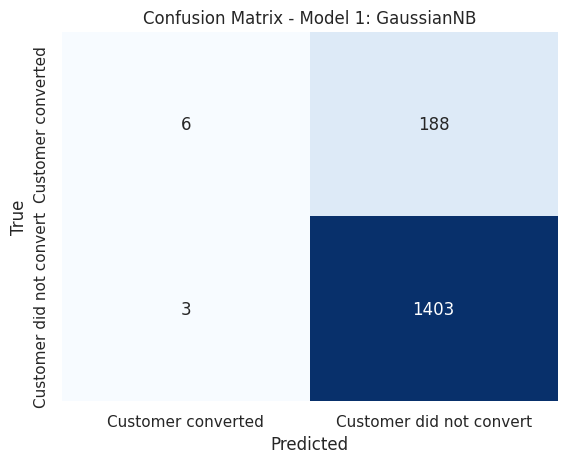

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.828125


Confusion matrix 

 [[  68  126]
 [ 149 1257]]

True Positives(TP) =  68

True Negatives(TN) =  1257

False Positives(FP) =  126

False Negatives(FN) =  149



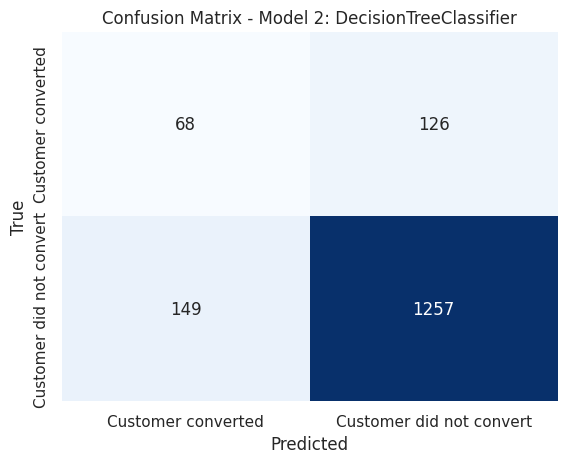

------------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.89375


Confusion matrix 

 [[  28  166]
 [   4 1402]]

True Positives(TP) =  28

True Negatives(TN) =  1402

False Positives(FP) =  166

False Negatives(FN) =  4



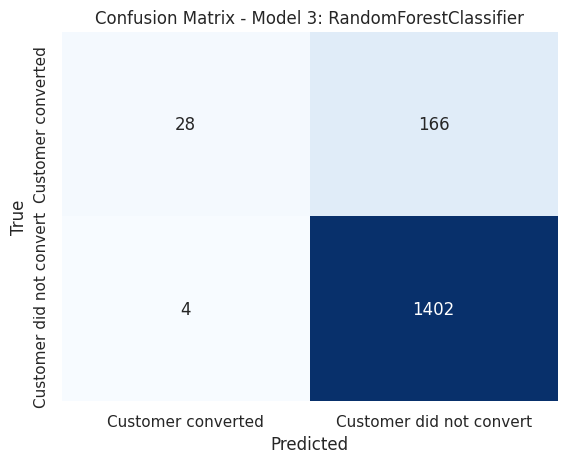

------------------
Model 4: LogisticRegression
Training Accuracy: 0.87625
Testing Accuracy: 0.879375


Confusion matrix 

 [[   2  192]
 [   1 1405]]

True Positives(TP) =  2

True Negatives(TN) =  1405

False Positives(FP) =  192

False Negatives(FN) =  1



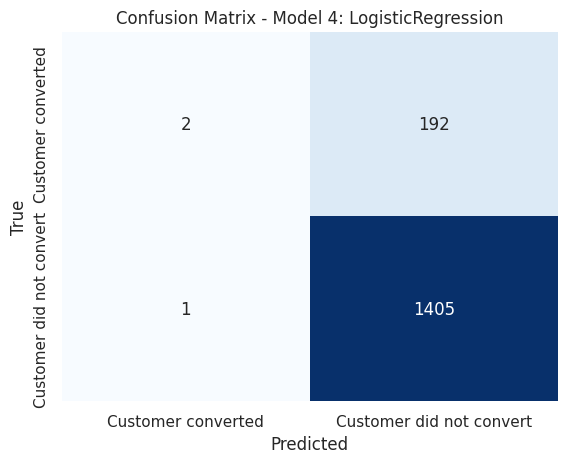

------------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.91203125
Testing Accuracy: 0.9075


Confusion matrix 

 [[  55  139]
 [   9 1397]]

True Positives(TP) =  55

True Negatives(TN) =  1397

False Positives(FP) =  139

False Negatives(FN) =  9



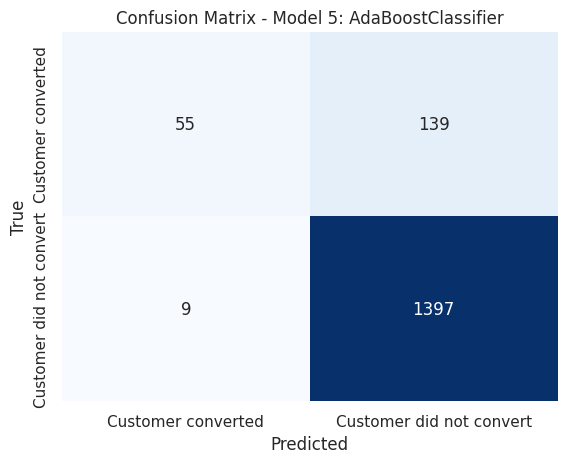

------------------
Model 6: XGBClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.91625


Confusion matrix 

 [[  88  106]
 [  28 1378]]

True Positives(TP) =  88

True Negatives(TN) =  1378

False Positives(FP) =  106

False Negatives(FN) =  28



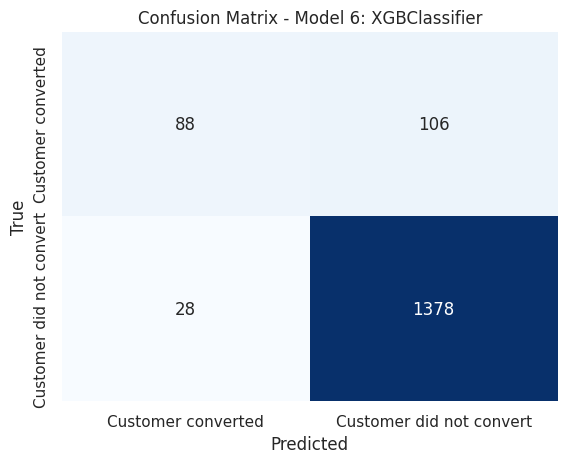

------------------
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Info] Number of positive: 5606, number of negative: 794
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.604062
[LightG

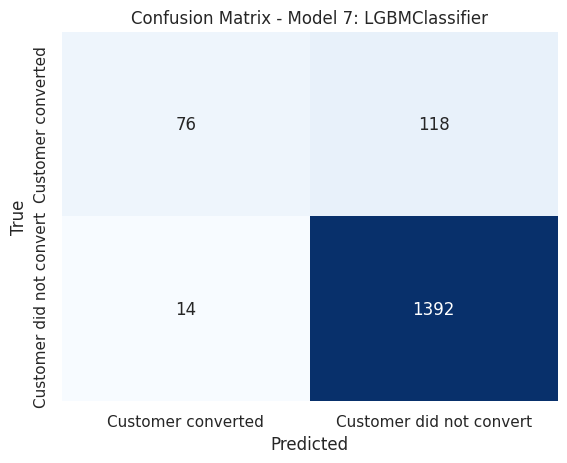

------------------
Model 8: KNeighborsClassifier
Training Accuracy: 0.87734375
Testing Accuracy: 0.878125


Confusion matrix 

 [[   1  193]
 [   2 1404]]

True Positives(TP) =  1

True Negatives(TN) =  1404

False Positives(FP) =  193

False Negatives(FN) =  2



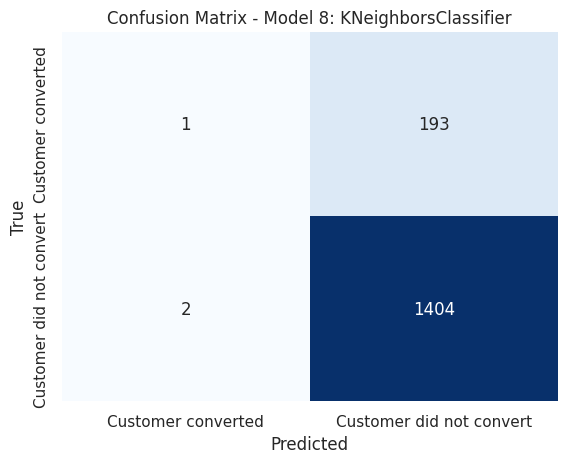

------------------
Model 9: GradientBoostingClassifier
Training Accuracy: 0.9415625
Testing Accuracy: 0.91875


Confusion matrix 

 [[  77  117]
 [  13 1393]]

True Positives(TP) =  77

True Negatives(TN) =  1393

False Positives(FP) =  117

False Negatives(FN) =  13



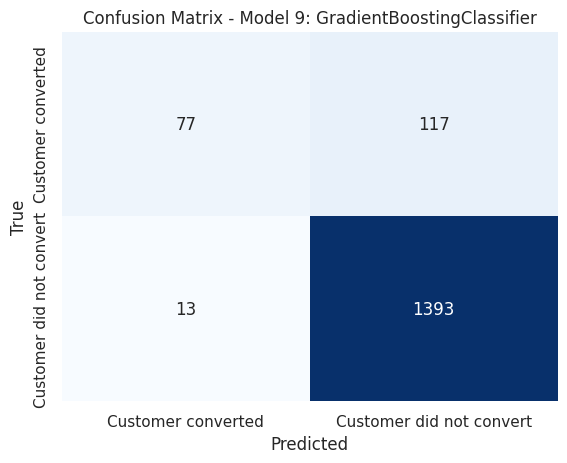

------------------


In [43]:
# plot matrix confusion
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print()

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    print()
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives(TP) = ', cm[0,0])
    print('\nTrue Negatives(TN) = ', cm[1,1])
    print('\nFalse Positives(FP) = ', cm[0,1])
    print('\nFalse Negatives(FN) = ', cm[1,0])
    print()
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=["Customer converted", "Customer did not convert"], 
                yticklabels=["Customer converted", "Customer did not convert"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    print("------------------")

### Analysis of the Confusion Matrix - Model: LGBMClassifier

The confusion matrix provided illustrates the performance of the **LGBMClassifier** in classifying customer conversion. Here's a breakdown of what each cell represents and the implications:

- **True Positives (Bottom-right: 1392):**
  - The model correctly identified 1,392 customers who **did not convert**. This is a strong indicator of the model's ability to accurately predict non-conversions, contributing to its high **Recall** for the non-converted class.

- **True Negatives (Top-left: 76):**
  - The model correctly identified 76 customers who **converted**. While this number is much smaller compared to true positives, it still reflects the model's ability to correctly identify some of the converted customers.

- **False Positives (Top-right: 118):**
  - The model incorrectly predicted that 118 customers **did not convert** when, in reality, they **converted**. This represents the model's **Type I Error**, which is relatively high compared to the true negatives. It suggests that the model may struggle with identifying customers who are likely to convert.

- **False Negatives (Bottom-left: 14):**
  - The model incorrectly predicted that 14 customers **converted** when, in fact, they **did not convert**. This **Type II Error** is quite low, which is a positive aspect, as it indicates that the model rarely misclassifies non-converting customers as converters.

### Key Insights:
1. **High Accuracy for Non-Converters:**
   - The model shows a strong ability to correctly predict non-conversions (1,392 out of 1,410 total non-converters), which is reflected in the high **True Positive** rate and low **False Negative** rate.

2. **Struggles with Predicting Converters:**
   - The model has a relatively higher error rate when predicting customers who actually converted, with 118 false positives compared to just 76 true negatives. This suggests that while the model is reliable in identifying non-converters, it has room for improvement in correctly identifying converters.

3. **Potential Focus for Improvement:**
   - To improve overall model performance, especially **Precision** and **Recall** for the converted class, it may be beneficial to fine-tune the model or explore additional features that could help better distinguish between customers likely to convert and those who are not.

### Conclusion:
The confusion matrix highlights the **LGBMClassifier**'s strength in predicting non-conversions but also reveals a challenge in accurately identifying converters. While the model's overall performance is strong, as seen in the previous analysis, further refinement may be necessary to enhance its precision in predicting customer conversions.

# Part 10) ROC curve models

Model 1: GaussianNB
Training Accuracy: 0.8809375
Testing Accuracy: 0.880625


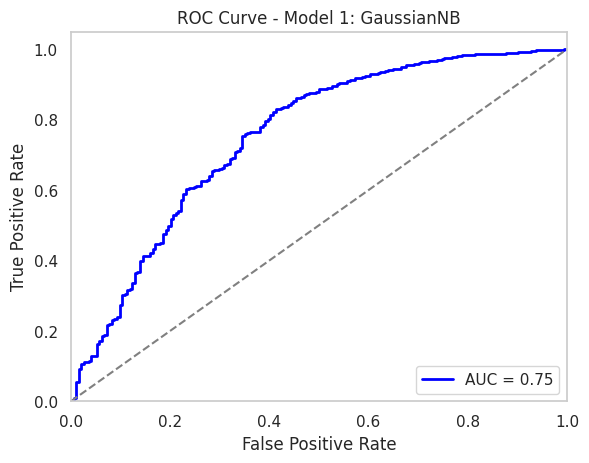

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.828125


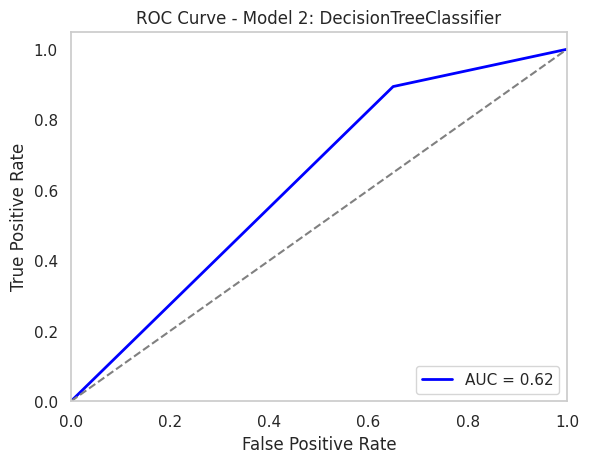

------------------
Model 3: KNeighborsClassifier
Training Accuracy: 0.88546875
Testing Accuracy: 0.863125


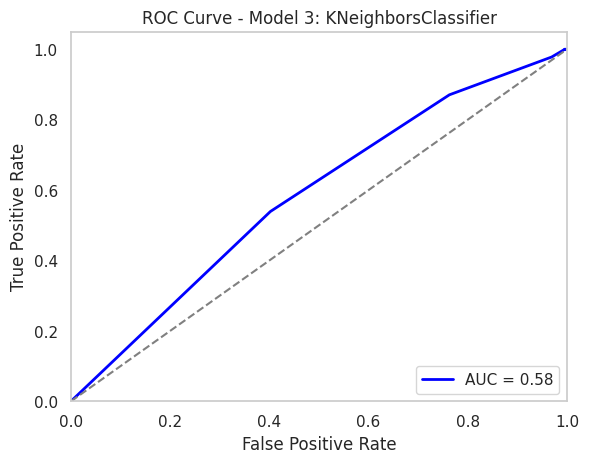

------------------
Model 4: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.89375


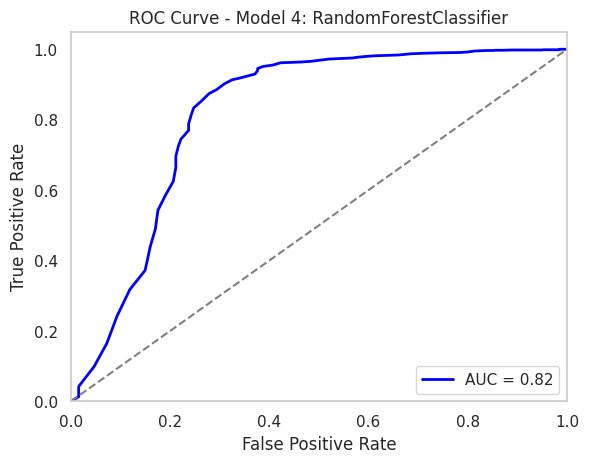

------------------
Model 5: LogisticRegression
Training Accuracy: 0.87625
Testing Accuracy: 0.879375


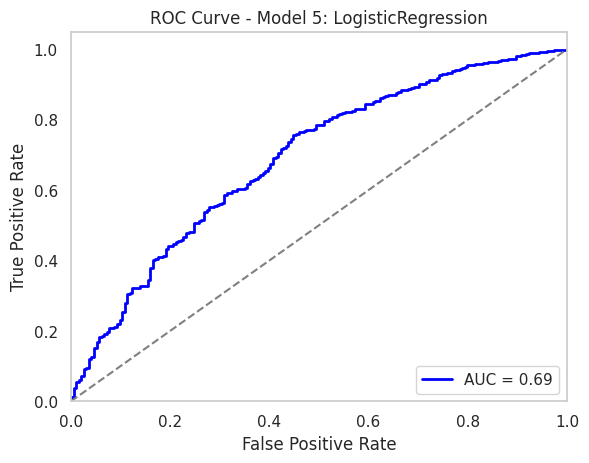

------------------
Model 6: AdaBoostClassifier
Training Accuracy: 0.91203125
Testing Accuracy: 0.9075


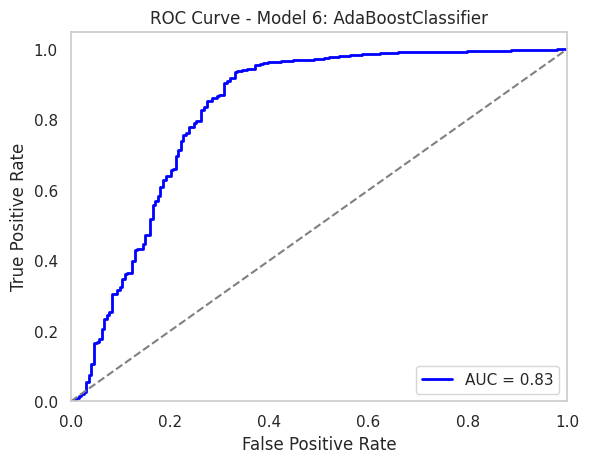

------------------
Model 7: SVC
Training Accuracy: 0.8759375
Testing Accuracy: 0.87875


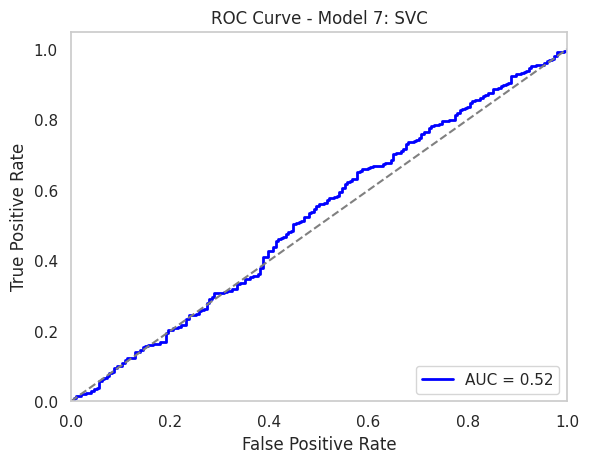

------------------
Model 8: GradientBoostingClassifier
Training Accuracy: 0.9415625
Testing Accuracy: 0.91875


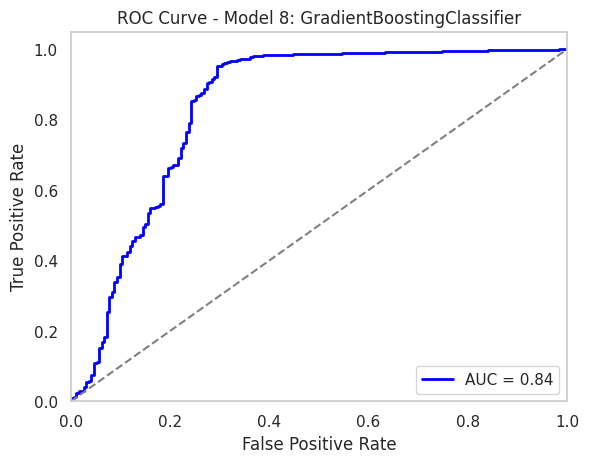

------------------
Model 9: XGBClassifier
Training Accuracy: 0.99984375
Testing Accuracy: 0.91625


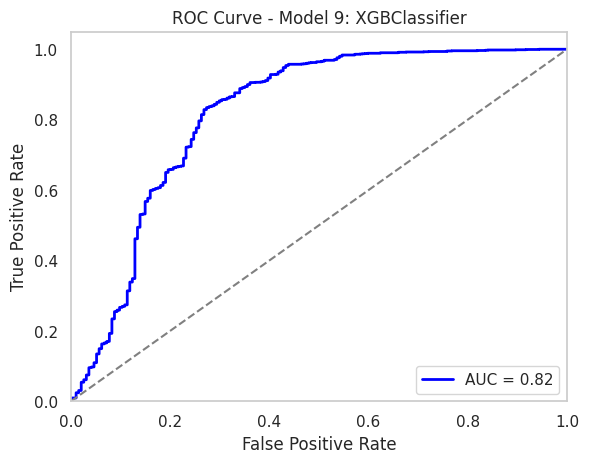

------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5606, number of negative: 794
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.875938 -> initscore=1.954509
[LightGBM] [Info] Start training from score 1.954509
Model 10: LGBMClassifier
Training Accuracy: 0.97734375
Testing Accuracy: 0.92


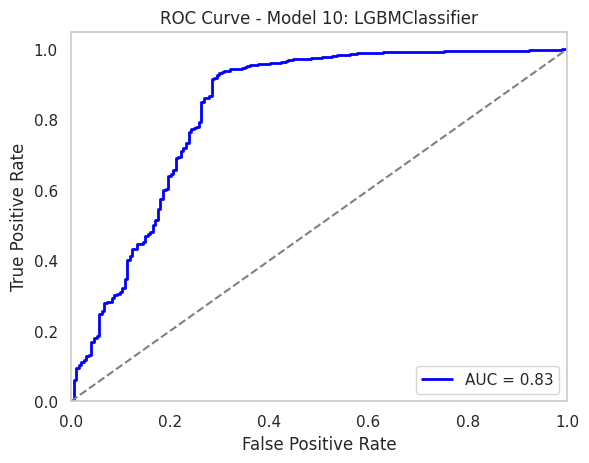

------------------
Model 11: CatBoostClassifier
Training Accuracy: 0.9771875
Testing Accuracy: 0.928125


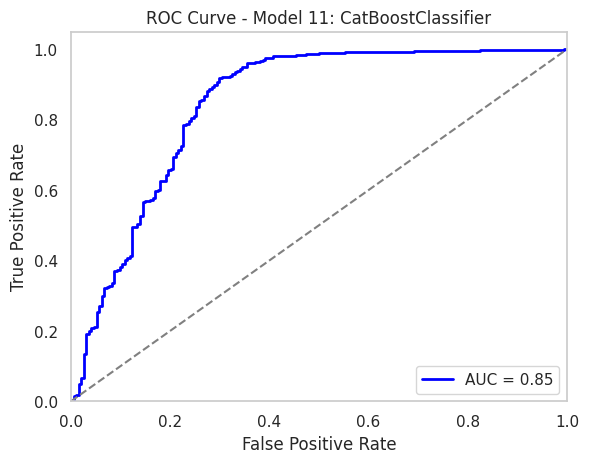

------------------


In [44]:
# Importing library
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier(),
    CatBoostClassifier(task_type='GPU', iterations=1000, learning_rate=0.1, depth=6, verbose=0, random_state=42)]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Calculate positive class probabilities
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_test, y_probs)
    
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model {i+1}: {type(model).__name__}')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
    
    print("------------------")

### Analysis of the ROC Curves

The Receiver Operating Characteristic (ROC) curves for the various models provide insight into their ability to discriminate between the two classes (conversion vs. non-conversion). The Area Under the Curve (AUC) is a critical metric that summarizes the overall performance of the model. Here's an analysis of each ROC curve:

1. **Model 1: GaussianNB**
   - **AUC = 0.75**
   - The Gaussian Naive Bayes classifier shows a moderate performance with an AUC of 0.75. The curve indicates that the model has a decent ability to distinguish between customers who will convert and those who will not. However, there is still room for improvement.

2. **Model 2: DecisionTreeClassifier**
   - **AUC = 0.62**
   - The Decision Tree classifier performs poorly with an AUC of 0.62. The curve is close to the diagonal, suggesting that the model struggles to make accurate distinctions between the two classes. This indicates a relatively high rate of false positives and false negatives.

3. **Model 3: KNeighborsClassifier**
   - **AUC = 0.58**
   - The K-Nearest Neighbors classifier also shows poor performance with an AUC of 0.58. The ROC curve is almost a straight line, indicating that the model is not much better than random guessing.

4. **Model 4: RandomForestClassifier**
   - **AUC = 0.82**
   - The Random Forest classifier demonstrates strong performance with an AUC of 0.82. The ROC curve is closer to the top-left corner, indicating that the model is effective at distinguishing between the two classes with a lower rate of false positives.

5. **Model 5: LogisticRegression**
   - **AUC = 0.69**
   - The Logistic Regression model shows moderate performance with an AUC of 0.69. While not as poor as the Decision Tree or KNN, it is still below the performance of ensemble methods like Random Forest or Gradient Boosting.

6. **Model 6: AdaBoostClassifier**
   - **AUC = 0.83**
   - AdaBoostClassifier performs very well, with an AUC of 0.83. The ROC curve suggests that this model is quite reliable in distinguishing between customers who will convert and those who will not, with a good balance between sensitivity and specificity.

7. **Model 7: SVC**
   - **AUC = 0.52**
   - The Support Vector Classifier (SVC) exhibits very poor performance with an AUC of 0.52, barely above the diagonal. This model does not perform well in this scenario and is almost equivalent to random guessing.

8. **Model 8: GradientBoostingClassifier**
   - **AUC = 0.84**
   - Gradient Boosting Classifier shows the best performance among the models with an AUC of 0.84. The ROC curve is close to the ideal top-left corner, indicating that the model has a high true positive rate while maintaining a low false positive rate.

9. **Model 9: XGBClassifier**
   - **AUC = 0.82**
   - The XGBoost model also performs strongly with an AUC of 0.82. The curve suggests that XGBoost is an effective model for this task, capable of distinguishing between the two classes with high accuracy.

10. **Model 10: LGBMClassifier**
    - **AUC = 0.83**
    - LightGBM also demonstrates strong performance with an AUC of 0.83. Similar to Gradient Boosting and XGBoost, it shows excellent discriminatory power, making it one of the top-performing models in this set.

### Conclusion:

- **Top Performers:**
  - The **GradientBoostingClassifier**, **AdaBoostClassifier**, **LGBMClassifier**, and **XGBClassifier** models stand out as the best performers, with AUC scores above 0.80, indicating high predictive power.

- **Underperformers:**
  - The **SVC**, **KNeighborsClassifier**, and **DecisionTreeClassifier** models performed poorly, with AUCs close to 0.50-0.60, suggesting that these models are not suitable for this task.

- **Recommendation:**
  - Given the AUC scores, ensemble models like Gradient Boosting, AdaBoost, and LightGBM are recommended for further development and deployment, as they provide the best balance between true positives and false positives.

# Part 11 - Classification report

In [45]:
# Importing library - classification_report models
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Models to be evaluated
models = [
          GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier(),
          CatBoostClassifier(task_type='GPU', iterations=1000, learning_rate=0.1, depth=6, verbose=0, random_state=42)]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print()
    
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Generate rating report
    report = classification_report(y_test, model.predict(X_test))
    print()
    print("Classification Report:")
    print()
    print(report)
    print()
    
    print("=======================================")


Model 1: GaussianNB

Training Accuracy: 0.8809375
Testing Accuracy: 0.880625

Classification Report:

              precision    recall  f1-score   support

         0.0       0.67      0.03      0.06       194
         1.0       0.88      1.00      0.94      1406

    accuracy                           0.88      1600
   macro avg       0.77      0.51      0.50      1600
weighted avg       0.86      0.88      0.83      1600



Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.828125

Classification Report:

              precision    recall  f1-score   support

         0.0       0.31      0.35      0.33       194
         1.0       0.91      0.89      0.90      1406

    accuracy                           0.83      1600
   macro avg       0.61      0.62      0.62      1600
weighted avg       0.84      0.83      0.83      1600



Model 3: KNeighborsClassifier

Training Accuracy: 0.88546875
Testing Accuracy: 0.863125

Classification Report:

              prec

---

#### **Model 1: GaussianNB**
- **Training Accuracy**: 0.8809
- **Testing Accuracy**: 0.8806
- **Key Observations**:
  - The model has a high recall (1.00) for class 1 (converted), indicating it correctly identifies almost all positive cases.
  - However, the precision for class 0 (non-converted) is very low (0.67), leading to a low f1-score for this class (0.06).
  - **Macro Average**: Shows a significant imbalance in performance across classes, with a much lower f1-score for class 0.

---

#### **Model 2: DecisionTreeClassifier**
- **Training Accuracy**: 1.0 (overfitting)
- **Testing Accuracy**: 0.8281
- **Key Observations**:
  - The model shows signs of overfitting, with perfect training accuracy but significantly lower testing accuracy.
  - Class 0 has a low recall (0.35) and precision (0.31), indicating difficulties in identifying non-converted customers.
  - **Weighted Avg**: The model performs well for class 1 but struggles with class 0.

---

#### **Model 3: KNeighborsClassifier**
- **Training Accuracy**: 0.8855
- **Testing Accuracy**: 0.8631
- **Key Observations**:
  - Similar to GaussianNB, the model has a high recall (0.98) for class 1 but poor precision for class 0 (0.16).
  - **Macro Average**: The model's macro f1-score is low, reflecting the poor performance in predicting class 0.

---

#### **Model 4: RandomForestClassifier**
- **Training Accuracy**: 1.0 (overfitting)
- **Testing Accuracy**: 0.8938
- **Key Observations**:
  - The model has high accuracy and performs well on class 1 but shows very low recall (0.14) for class 0.
  - **Weighted Avg**: High overall performance but struggles with identifying non-converted customers.

---

#### **Model 5: LogisticRegression**
- **Training Accuracy**: 0.8763
- **Testing Accuracy**: 0.8794
- **Key Observations**:
  - The model has similar performance to GaussianNB, with high precision and recall for class 1 but very poor metrics for class 0.
  - **Macro Average**: Indicates significant imbalance, with poor performance for class 0.

---

#### **Model 6: AdaBoostClassifier**
- **Training Accuracy**: 0.9120
- **Testing Accuracy**: 0.9075
- **Key Observations**:
  - AdaBoost shows a notable improvement with better precision (0.86) and recall (0.28) for class 0, though still not ideal.
  - **Weighted Avg**: Good balance between precision and recall, making it a strong performer.

---

#### **Model 7: XGBClassifier**
- **Training Accuracy**: 0.9998
- **Testing Accuracy**: 0.9163
- **Key Observations**:
  - XGBoost performs well across both classes, with improved recall (0.43) for class 0 compared to previous models.
  - **Weighted Avg**: High performance, showing better balance between the classes.

---

#### **Model 8: LGBMClassifier**
- **Training Accuracy**: 0.9773
- **Testing Accuracy**: 0.92
- **Key Observations**:
  - LightGBM shows strong performance with high precision (0.80) and recall (0.45) for class 0, and excellent metrics for class 1.
  - **Weighted Avg**: Indicates a well-balanced model, performing effectively across both classes.

---

#### **Model 9: CatBoostClassifier**
- **Training Accuracy**: 0.9772
- **Testing Accuracy**: 0.9281
- **Key Observations**:
  - CatBoost provides the best balance, with significantly improved recall (0.48) for class 0 and excellent performance for class 1.
  - **Weighted Avg**: Highest overall performance, making it the top model among the tested classifiers.

---

### Conclusion:
- **Top Performers**: **CatBoostClassifier**, **LGBMClassifier**, and **XGBClassifier** stand out as the best models with high accuracy and balanced performance across both classes.
- **Struggling Models**: **GaussianNB**, **KNeighborsClassifier**, and **LogisticRegression** exhibit poor performance in predicting non-conversions (class 0), making them less suitable for this task.
- **Overfitting Concerns**: **DecisionTreeClassifier** and **RandomForestClassifier** show signs of overfitting, with perfect training accuracy but reduced testing accuracy.

For the most reliable predictions with balanced performance, **CatBoostClassifier** and **LGBMClassifier** are recommended for deployment.

# Part 12 - Result models

In [46]:
# Models to be evaluated
models = [GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          GradientBoostingClassifier(random_state=42),
          LGBMClassifier()]

# List to store metrics for each model
metricas = []

# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    
    # Extract metrics of interest from the report
    metrics = {"Model": type(model).__name__,
               "Accuracy": test_accuracy,
               "Precision": report['weighted avg']['precision'],
               "Recall": report['weighted avg']['recall'],
               "F1-score": report['weighted avg']['f1-score'],
               "Support": report['weighted avg']['support']
              }
    metricas.append(metrics)

# Convert the list of dictionaries into a DataFrame
df_metricas = pd.DataFrame(metricas)

# Function to highlight the maximum value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlighting function
df_metricas_styled = df_metricas.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Display the styled DataFrame with metrics
df_metricas_styled

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5606, number of negative: 794
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.875938 -> initscore=1.954509
[LightGBM] [Info] Start training from score 1.954509


# Part 13 - Conclusion

### Conclusion of the Model Performance

The table presents the performance metrics for various classification models, including **Accuracy**, **Precision**, **Recall**, **F1-score**, and **Support**. Based on the results, the following conclusions can be drawn:

1. **Top Performing Models:**
   - The **LGBMClassifier** (LightGBM) and **GradientBoostingClassifier** stand out as the top performers in this analysis.
   - The **LGBMClassifier** achieved the highest **Accuracy** of 0.9200, the highest **Recall** of 0.9200, and a very competitive **Precision** of 0.9132, leading to an **F1-score** of 0.9101.
   - The **GradientBoostingClassifier** also performed exceptionally well with an **Accuracy** of 0.9188, the highest **Precision** of 0.9144, and an **F1-score** of 0.9053.

2. **Model Selection:**
   - While the **LGBMClassifier** has the edge in **Accuracy** and **Recall**, the **GradientBoostingClassifier** offers slightly better **Precision**. Both models are suitable choices, but **LGBMClassifier** might be preferable if the goal is to maximize **Accuracy** and **Recall**.
   - The **F1-score** for both models is quite high, indicating a good balance between Precision and Recall, with **LGBMClassifier** having a slight advantage.

3. **Other Models:**
   - **XGBClassifier** and **AdaBoostClassifier** also showed strong performance but fell slightly behind the top two models, particularly in **F1-score**.
   - Models like **GaussianNB**, **DecisionTreeClassifier**, and **KNeighborsClassifier** performed relatively worse, especially in terms of **Precision** and **F1-score**, indicating that these models might not be as reliable for this specific task.

### Recommendation:
Given the results, the **LGBMClassifier** is recommended as the best model for this classification task, offering the highest **Accuracy** and **Recall**, which are critical for many real-world applications where correctly identifying positive instances is crucial. However, the **GradientBoostingClassifier** also remains a strong candidate, particularly if slightly higher **Precision** is required.

This analysis highlights the importance of evaluating multiple performance metrics to choose the best model based on the specific needs of the task.